In [148]:
pacman::p_load(data.table,ggplot2,ggalt,ggthemes,lubridate,dplyr,
               RColorBrewer,patchwork,ggupset,nnspat,VGAM,ggdensity)

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done


ggdensity installed



In [2]:
sessionInfo()

R version 4.1.0 (2021-05-18)
Platform: x86_64-conda-linux-gnu (64-bit)
Running under: CentOS Linux 7 (Core)

Matrix products: default
BLAS/LAPACK: /vortexfs1/home/akrinos/.conda/envs/EUKulele/envs/rversion4/lib/libopenblasp-r0.3.15.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] splines   stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] VGAM_1.1-11        nnspat_0.1.2       ggupset_0.3.0      patchwork_1.2.0   
 [5] RColorBrewer_1.1-3 dplyr_1.1.4        lubridate_1.9.3    ggthemes_5.1.0    
 [9] ggalt_0.6.2        ggplot2_3.5.1      data.table_1.15.2 

loaded via a namespace (and 

In [3]:
wrld <- map_data("world")

gg <- ggplot()
gg <- gg + geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA)
gg <- gg + coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
gg <- gg + theme_map()

Warning message:
“Duplicated aesthetics after
name standardisation: fill”
Warning message:
“Using `size` aesthetic for
lines was deprecated in
ggplot2 3.4.0.
ℹ Please use `linewidth`
  instead.”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x
and y”


In [4]:
norberg_intercept<-function(a,b,width,opt,intercept_1=TRUE){
    if (intercept_1) {
        return(width/2+opt)
    } else {
        return(-width/2+opt)
    }
}

In [5]:
list_of_temp_opt=c(0.0,3.5,7,10.5,14,17.5,21,24.5,28,31.5)
list_of_a=rev(sort(rep(c(0.30,0.29,0.28,0.27,0.26,0.25),10)))
list_of_b=rep(0.066171077,60)
list_of_w=sort(rep(c(16,18,20,24,28,32),10))
tracer=c(1:60)
tracer_fr_more_widths=data.frame("Tracer"=tracer,
                                 "w"=list_of_w,
                                 "a"=list_of_a,
                                 "b"=list_of_b,
                                 "opt"=list_of_temp_opt,
                                 "Scenario"="Generalist-Specialist")%>%
    rowwise() %>%
    dplyr::mutate(LowIntercept=min(norberg_intercept(a,b,w,opt,TRUE),
                                   norberg_intercept(a,b,w,opt,FALSE)),
                  HighIntercept=max(norberg_intercept(a,b,w,opt,TRUE),
                                   norberg_intercept(a,b,w,opt,FALSE)))

In [6]:
ALL_EHUX = read.csv('../../data/00-ehux-all-strains.csv')
## read in Harriet's colors

strain_color_frame_harriet = data.frame("Strains_full"=c("RCC6856","RCC6071","RCC1212","RCC3963",
                                                   "RCC874","CCMP1280","RCC4567","RCC914","RCC3492",
                                                   "CCMP371","RCC1215","CCMP377","RCC1239",
                                                   "RCC1222","RCC1256","CCMP374","CCMP379","CCMP1516",
                                                   "CCMP2090","CCMP375"),
                                        "Strains"=c("6856","6071","1212","3963",
                                                   "874","1280","4567","914","3492",
                                                   "371","1215","377","1239",
                                                   "1222","1256","374","379","1516",
                                                   "2090","375"),
                                        "Colors"=c("#4443c6","#c688ff","#7d328b","#da1b9d",
                                                  "#f87fa2","#b90033","#ff5755","#c31d0b",
                                                  "#ff6235","#ffc10c","#e4e366","#5a9f00",
                                                  "#60b574","#00b9bf","#0194e3","#C2C95E",
                                                  "#5EC9C9","#000000","#DBDBDB","#013220"))

simple_frame = ALL_EHUX %>%
    dplyr::select("Latitude","Longitude","X") %>%
    dplyr::bind_rows(data.frame("X"=c("CCMP371","CCMP1280","CCMP375","CCMP377",
                       "CCMP1516","CCMP2090","CCMP379","RCC4567","CCMP371","CCMP374"),
                "Latitude"=c(32,-12,32,43,-2.67,-2.67,50.1669,-11.48,32,42.5),
                "Longitude"=c(-62,-35,-62,-68,-82.72,-82.72,-4.2504,-25.05,-62,-69)))

color_frame=simple_frame %>%
    dplyr::left_join(strain_color_frame_harriet,by=c("X"="Strains_full"))

In [7]:
morewidthsdir="../../data/Darwin_Simulations/ModWidths_FixedHet_MostConservative"

temps_ModWidths_ConRange_MoreWidths=data.frame(fread(file.path(morewidthsdir,
                                    "tave.ScenarioB_no_low_opt.revise.concatenated_temp_phys_tave_monthly_all_biomass.csv")))

temps_ModWidths_ConRange_MoreWidths=temps_ModWidths_ConRange_MoreWidths %>%
    dplyr::mutate(DateTime = strptime(Time, format='%Y-%b-%d %H:%M:%S'))

all_all_depths_ModWidths_ConRange_MoreWidths=data.frame(fread(file.path(morewidthsdir,
                                                         "ScenarioB_depths_2Oct2023_temp_tave_monthly_all_biomass.csv")))

all_all_depths_ModWidths_ConRange_MoreWidths = all_all_depths_ModWidths_ConRange_MoreWidths %>%
    dplyr::mutate(DateTime = strptime(Time, format='%Y-%b-%d %H:%M:%S'))

merged_all_w_temp_scen=all_all_depths_ModWidths_ConRange_MoreWidths %>%
    dplyr::left_join(tracer_fr_more_widths, by=c("Tracer"))

topt_dict=merged_all_w_temp_scen

duplicates_dropped=topt_dict %>% dplyr::distinct(Latitude,Longitude,DateTime,w,opt,
                                                 biomass)

# filter based on time
duplicates_dropped_filt = duplicates_dropped %>% 
    dplyr::filter(DateTime>as.POSIXct("2008-12-01",format="%Y-%m-%d"))

# get total biomass of all time in last year of sim
total_biomass=duplicates_dropped_filt %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(total_biomass=sum(biomass,na.rm=TRUE))

# summarize weighted biomass in final year of simulation
duplicates_dropped_filt_summary = duplicates_dropped_filt %>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude")) %>%
    dplyr::mutate(WeightedWidths=(w*biomass)/total_biomass) %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(WeightedWidth=sum(WeightedWidths,na.rm=TRUE))

total_biomass=duplicates_dropped_filt %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>%
    dplyr::summarize(total_biomass=sum(biomass,na.rm=TRUE))

## filter timepoints and tracers w/ biomass > 0.01
get_topts_higher_biomass = duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>% # include DateTime if you want a seasonality component
    dplyr::filter(biomass/total_biomass > 0.01) %>%
    dplyr::ungroup() %>% 
    dplyr::distinct(Latitude,Longitude,w,opt) %>%
    dplyr::left_join(tracer_fr_more_widths)

`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.
`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.
`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.
Joining with `by = join_by(w,
opt)`


In [189]:
head(get_topts_higher_biomass)

Latitude Longitude w  opt Tracer a   b          Scenario             
1 -77.5    164.5     16 0   1      0.3 0.06617108 Generalist-Specialist
2 -77.5    165.5     16 0   1      0.3 0.06617108 Generalist-Specialist
3 -77.5    169.5     16 0   1      0.3 0.06617108 Generalist-Specialist
4 -77.5    170.5     16 0   1      0.3 0.06617108 Generalist-Specialist
5 -77.5    171.5     16 0   1      0.3 0.06617108 Generalist-Specialist
6 -77.5    172.5     16 0   1      0.3 0.06617108 Generalist-Specialist
  LowIntercept HighIntercept key  
1 -8           8             noval
2 -8           8             noval
3 -8           8             noval
4 -8           8             noval
5 -8           8             noval
6 -8           8             noval

In [81]:
head(duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)%>%
    dplyr::filter((opt==17.5)&(w==20)) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)))

Latitude Longitude DateTime            w  opt  biomass total_biomass
1 30.5     0.5       2008-12-13 07:00:00 20 17.5 0       0            
2 30.5     1.5       2008-12-13 07:00:00 20 17.5 0       0            
3 30.5     2.5       2008-12-13 07:00:00 20 17.5 0       0            
4 30.5     3.5       2008-12-13 07:00:00 20 17.5 0       0            
5 30.5     4.5       2008-12-13 07:00:00 20 17.5 0       0            
6 30.5     5.5       2008-12-13 07:00:00 20 17.5 0       0

Warning message in geom_tile(aes(x = Longitude, y = Latitude, fill = biomass/total_biomass), :
“Ignoring unknown parameters:
`na.value`”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 3468 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 3468 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”


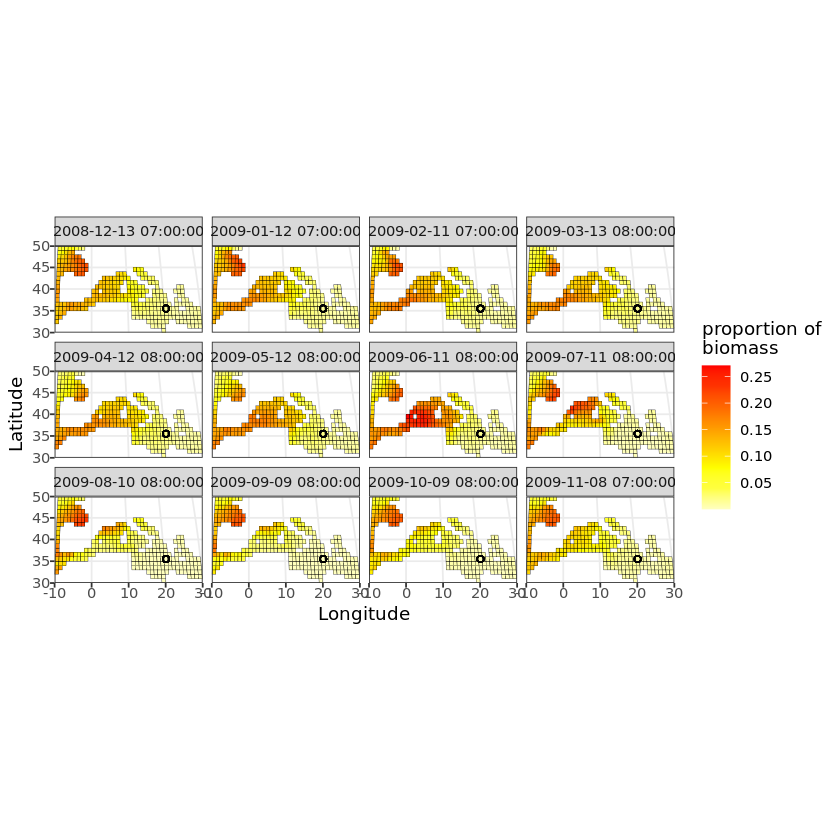

In [117]:
ggplot(duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)%>%
    dplyr::filter((opt==17.5)&(w==20)&(total_biomass>0)) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=biomass/total_biomass),color="black",na.value="gray") + 
    geom_point(aes(x=20.5,y=35.5),pch=21) + 
    scale_fill_gradientn(colours = rev(heat.colors(8)),
                         na.value="transparent",name="proportion of\nbiomass") + 
    theme_bw()+ 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50)) + facet_wrap(~DateTime)

ggsave("proportion_of_biomass.pdf",width=10,height=8,units="in")

Warning message in geom_tile(aes(x = Longitude, y = Latitude, fill = isSelected), :
“Ignoring unknown parameters:
`na.value`”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 3468 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 3468 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”


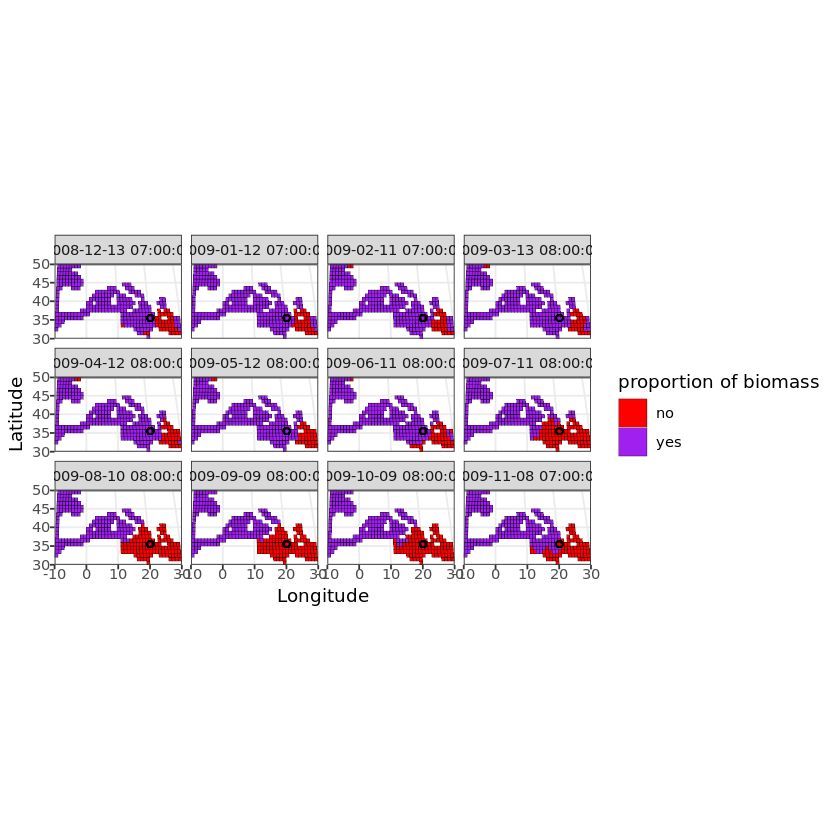

In [193]:
ggplot(duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)%>%
    dplyr::filter((opt==17.5)&(w==20)&(total_biomass>0)) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)) %>%
    dplyr::mutate(isSelected=case_when((biomass/total_biomass)>0.01 ~ "yes",
                                       TRUE ~ "no")))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=isSelected),color="black",na.value="gray") + 
    geom_point(aes(x=20.5,y=35.5),pch=21)+ 
    scale_fill_manual(values=c("red","purple"),breaks=c("no","yes"),
                         na.value="transparent",name="proportion of biomass") + 
    theme_bw()+ 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50)) + facet_wrap(~DateTime)

ggsave("makes_proportion.pdf",width=10,height=8,units="in")

`summarise()` has grouped
output by 'Latitude',
'Longitude', 'w'. You can
override using the `.groups`
argument.
Warning message in geom_tile(aes(x = Longitude, y = Latitude, fill = isSelected), :
“Ignoring unknown parameters:
`na.value`”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 289 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”
Warning message in geom_point(aes(x = 20.5, y = 35.5), pch = 21):
“All aesthetics have length 1,
but the data has 289 rows.
ℹ Please consider using
  `annotate()` or provide this
  layer with data containing a
  single row.”


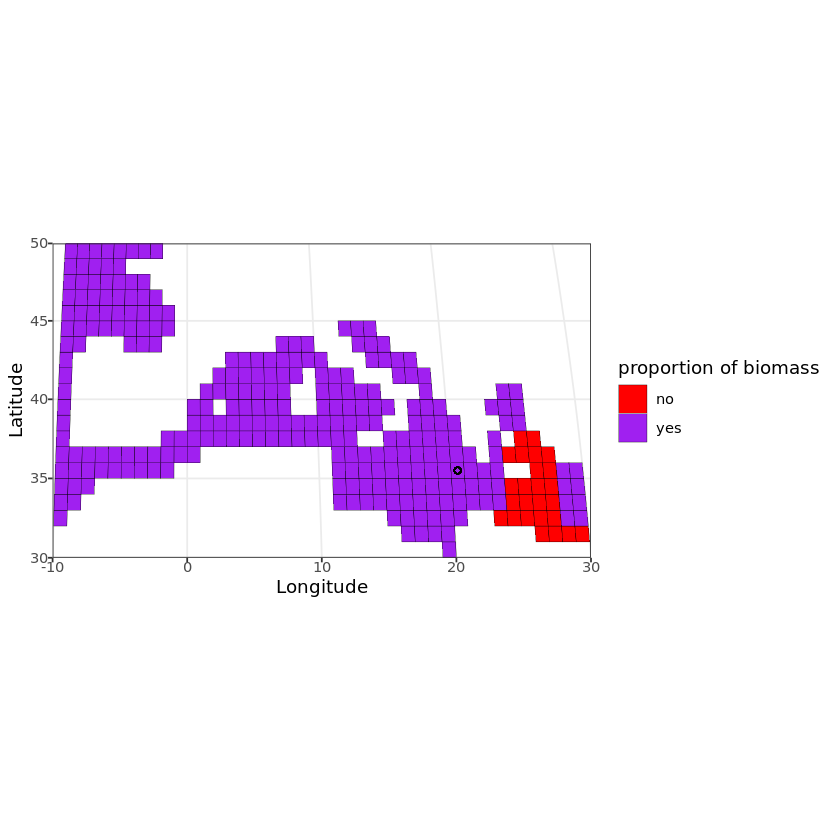

In [192]:

ggplot(duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)%>%
    dplyr::filter((opt==17.5)&(w==20)&(total_biomass>0)) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)) %>%
    dplyr::mutate(isSelected=case_when((biomass/total_biomass)>0.01 ~ "yes",
                                       TRUE ~ "no"))%>%
    dplyr::ungroup() %>% 
    dplyr::distinct(Latitude,Longitude,w,opt,isSelected) %>%
    dplyr::group_by(Latitude,Longitude,w,opt) %>%
    dplyr::summarize(isSelected=paste(isSelected,collapse="_")) %>%
    dplyr::mutate(isSelected=case_when(grepl("_",isSelected)&grepl("yes",isSelected)~"yes",
                                       TRUE ~ isSelected)))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=isSelected),color="black",na.value="gray") + 
    geom_point(aes(x=20.5,y=35.5),pch=21)+ 
    scale_fill_manual(values=c("red","purple"),breaks=c("no","yes"),
                         na.value="transparent",name="proportion of biomass") + 
    theme_bw()+ 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50))

ggsave("combined_for_bivar.pdf",width=10,height=8,units="in")

In [93]:
shapiro.test((get_topts_higher_biomass %>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Longitude==20.5)&(Latitude==35.5)))$HighIntercept)


	Shapiro-Wilk normality test

data:  (get_topts_higher_biomass %>% dplyr::mutate(Longitude = (Longitude + 180)%%360 - 180) %>% dplyr::filter((Longitude == 20.5) & (Latitude == 35.5)))$HighIntercept
W = 0.96803, p-value = 0.872


`summarise()` has grouped
output by 'Latitude',
'Longitude', 'w'. You can
override using the `.groups`
argument.
Joining with `by = join_by(w,
opt)`


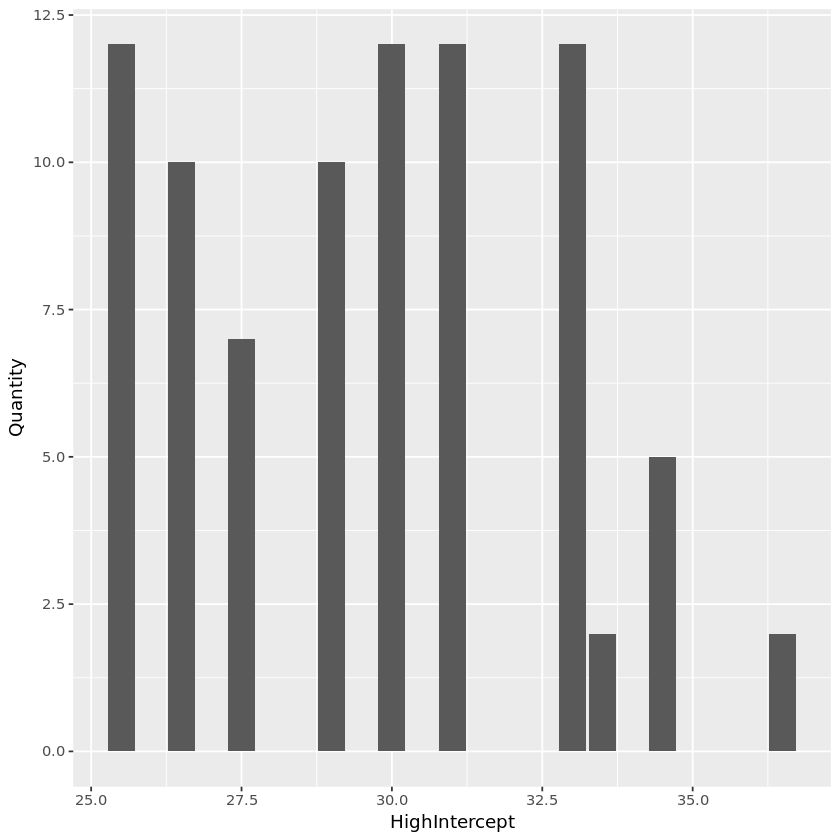

In [96]:
revised_plot_check = duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>% # include DateTime if you want a seasonality component
    dplyr::filter(biomass/total_biomass > 0.01) %>%
    dplyr::ungroup() %>% 
    dplyr::group_by(Latitude,Longitude,w,opt) %>%
    dplyr::summarize(Quantity=length(biomass)) %>%
    dplyr::left_join(tracer_fr_more_widths)
ggplot(revised_plot_check %>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Longitude==20.5)&(Latitude==35.5))) + 
    geom_bar(aes(x=HighIntercept,y=Quantity),stat="identity")

In [195]:
get_topts_higher_biomass %>% dplyr::filter((opt==17.5)&(w==20))

Latitude Longitude w  opt  Tracer a    b          Scenario             
1    -45.5    145.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
2    -45.5    146.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
3    -45.5    147.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
4    -45.5    148.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
5    -45.5    149.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
6    -44.5    145.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
7    -44.5    146.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
8    -44.5    147.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
9    -44.5    148.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
10   -44.5    149.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
11   -44.5    150.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
12   -44.5    151.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
13   -44.5    152.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
14   -44.5    155.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
15   -44.5    156.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
16   -44.5    157.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
17   -44.5    158.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
18   -44.5    159.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
19   -44.5    160.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
20   -44.5    161.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
21   -44.5    162.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
22   -44.5    163.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
23   -44.5    164.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
24   -44.5    165.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
25   -44.5    166.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
26   -44.5    167.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
27   -43.5    147.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
28   -43.5    148.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
29   -43.5    149.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
30   -43.5    150.5     20 17.5 26     0.28 0.06617108 Generalist-Specialist
⋮    ⋮        ⋮         ⋮  ⋮    ⋮      ⋮    ⋮          ⋮                    
5713 -33.5     161.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5714 -32.5     163.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5715 -31.5     166.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5716 -29.5     -88.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5717 -28.5     -89.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5718 -22.5      -2.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5719 -18.5     -79.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5720 -15.5       3.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5721  33.5    -127.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5722  43.5    -159.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5723  44.5     158.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5724  44.5     165.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5725  44.5     172.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5726  45.5     152.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5727  45.5     -53.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5728  51.5     -44.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5729  52.5      -5.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5730  54.5     -25.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5731 -38.5      10.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5732 -36.5      43.5    20 17.5 26     0.28 0.06617108 Generalist-Specialist
5

Warning message:
“Use of
`for_plot$HighIntercept` is
discouraged.
ℹ Use `HighIntercept` instead.”
Warning message:
“Use of
`for_plot$HighIntercept` is
discouraged.
ℹ Use `HighIntercept` instead.”
Saving 6.67 x 6.67 in image
Warning message:
“Use of
`for_plot$HighIntercept` is
discouraged.
ℹ Use `HighIntercept` instead.”
Warning message:
“Use of
`for_plot$HighIntercept` is
discouraged.
ℹ Use `HighIntercept` instead.”


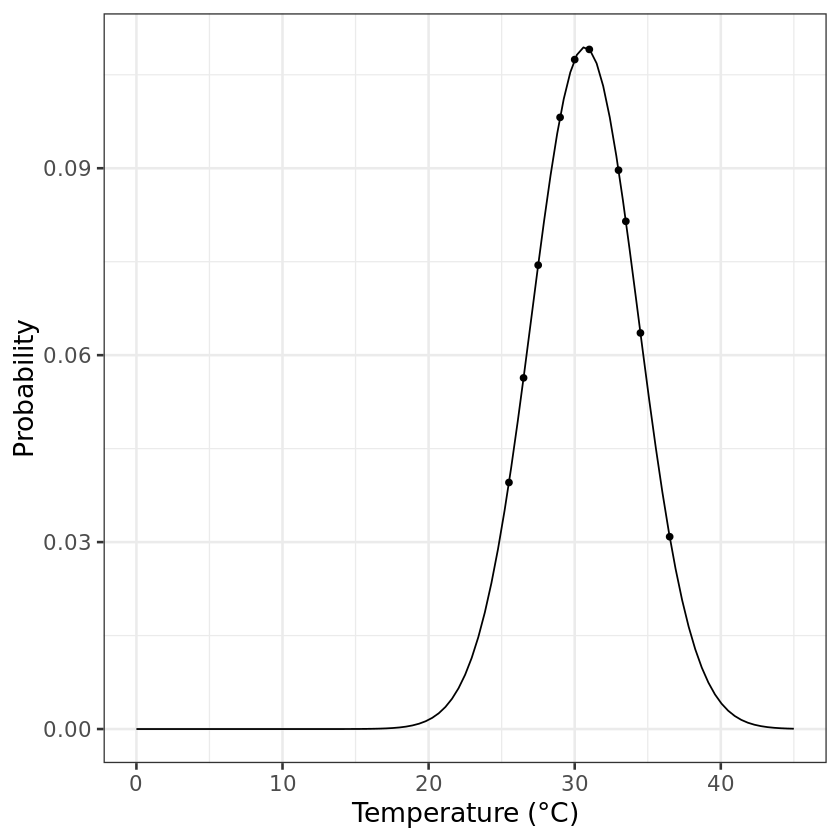

In [188]:
for_plot=get_topts_higher_biomass %>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Longitude==20.5)&(Latitude==35.5))
ggplot(for_plot,aes(x=HighIntercept)) + xlim(c(0,45)) + 
    #geom_histogram(aes(x=HighIntercept))+
    stat_function(fun = dnorm, n = 101, args = list(mean = mean(for_plot$HighIntercept), 
                                                    sd = sd(for_plot$HighIntercept)))+
    geom_point(aes(x=HighIntercept,dnorm(HighIntercept, mean(for_plot$HighIntercept), 
                                         sd(for_plot$HighIntercept)))) + 
    ylab("Probability") + xlab("Temperature (°C)") + theme_bw(base_size=16)

ggsave("normal_distribution.pdf")

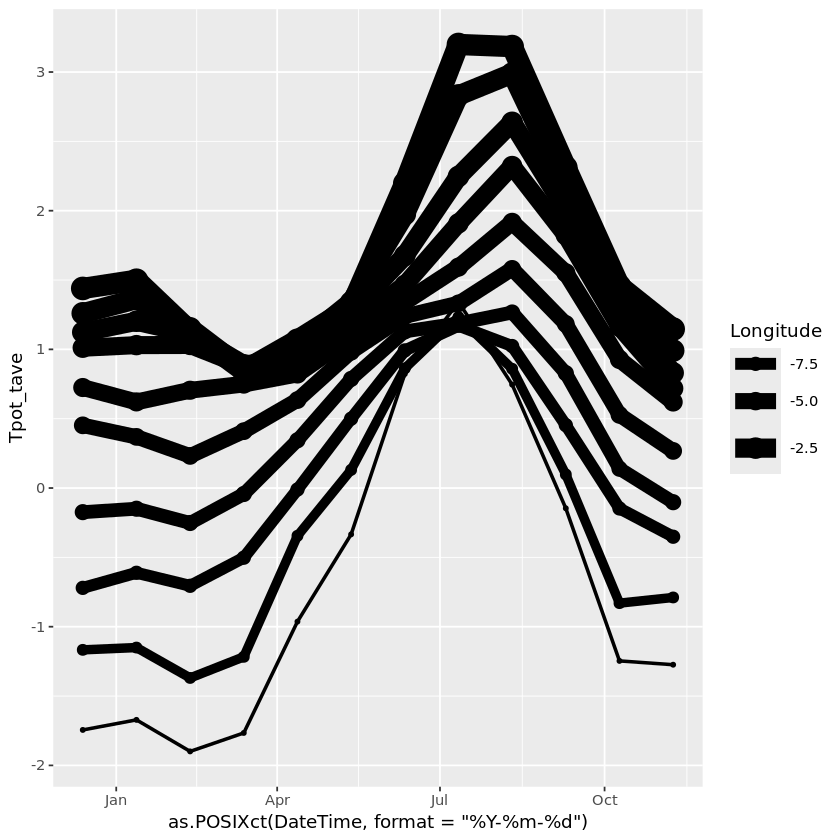

In [57]:
ggplot(temps_ModWidths_ConRange_MoreWidths %>% 
    dplyr::filter(DateTime>as.POSIXct("2008-12-01",format="%Y-%m-%d")) %>%
    dplyr::filter((Longitude>350)&(Latitude==79.5))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)) + 
    geom_point(aes(x=as.POSIXct(DateTime,format="%Y-%m-%d"),y=Tpot_tave,size=Longitude))+ 
    geom_line(aes(x=as.POSIXct(DateTime,format="%Y-%m-%d"),y=Tpot_tave,size=Longitude,group=Longitude))

In [71]:
## filter timepoints and tracers w/ biomass > 0.01
get_topts_higher_biomass_keep_times = duplicates_dropped_filt%>% 
    dplyr::left_join(total_biomass,by=c("Latitude","Longitude","DateTime"))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>% # include DateTime if you want a seasonality component
    dplyr::filter(biomass/total_biomass > 0.01) %>%
    dplyr::ungroup() %>% 
    dplyr::distinct(Latitude,Longitude,w,opt,DateTime) %>%
    dplyr::left_join(tracer_fr_more_widths)

Joining with `by = join_by(w,
opt)`


In [40]:
head(get_topts_higher_biomass_keep_times)

Latitude Longitude w  opt DateTime            Tracer a   b         
1 -77.5    164.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
2 -77.5    165.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
3 -77.5    169.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
4 -77.5    170.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
5 -77.5    171.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
6 -77.5    172.5     16 0   2008-12-13 07:00:00 1      0.3 0.06617108
  Scenario              LowIntercept HighIntercept
1 Generalist-Specialist -8           8            
2 Generalist-Specialist -8           8            
3 Generalist-Specialist -8           8            
4 Generalist-Specialist -8           8            
5 Generalist-Specialist -8           8            
6 Generalist-Specialist -8           8

In [8]:
head(get_topts_higher_biomass)

Latitude Longitude w  opt Tracer a   b          Scenario             
1 -77.5    164.5     16 0   1      0.3 0.06617108 Generalist-Specialist
2 -77.5    165.5     16 0   1      0.3 0.06617108 Generalist-Specialist
3 -77.5    169.5     16 0   1      0.3 0.06617108 Generalist-Specialist
4 -77.5    170.5     16 0   1      0.3 0.06617108 Generalist-Specialist
5 -77.5    171.5     16 0   1      0.3 0.06617108 Generalist-Specialist
6 -77.5    172.5     16 0   1      0.3 0.06617108 Generalist-Specialist
  LowIntercept HighIntercept
1 -8           8            
2 -8           8            
3 -8           8            
4 -8           8            
5 -8           8            
6 -8           8

`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.
Warning message in geom_tile(aes(x = Longitude, y = Latitude, fill = total_ecotypes), :
“Ignoring unknown parameters:
`na.value`”


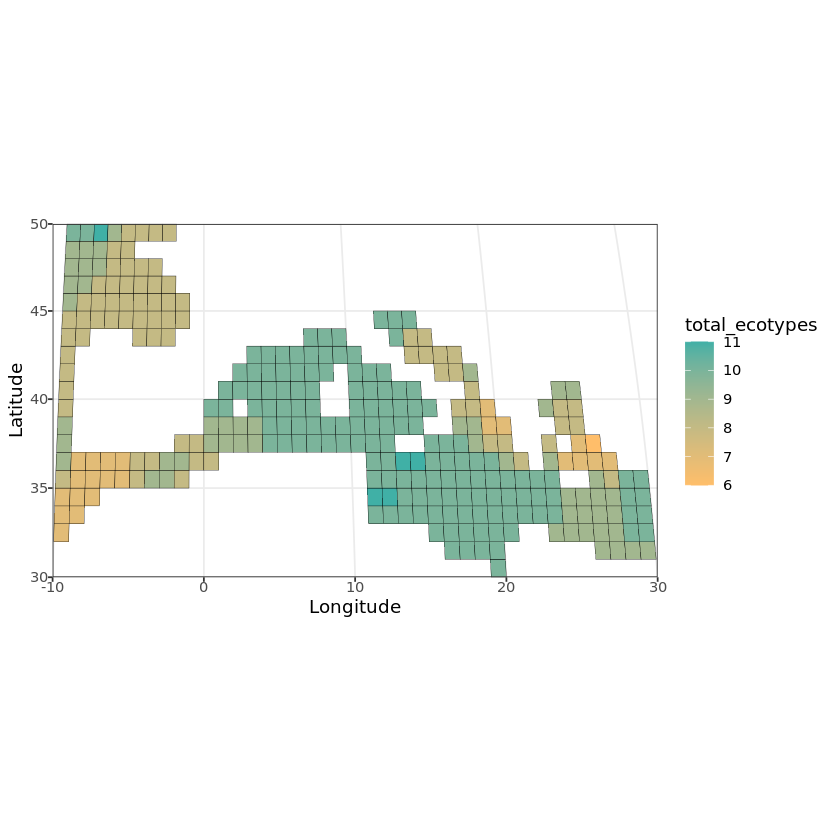

In [8]:
ggplot(get_topts_higher_biomass %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(total_ecotypes=length(LowIntercept)) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)))+# %>%
    #dplyr::filter((Latitude>10)&(Latitude<40)&(Longitude>-155)&(Longitude< -145)))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=total_ecotypes),color="black",na.value="gray") + 
    scale_fill_gradient(low="#FFBE6A",high="#40B0A6") + 
    theme_bw()+ 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50))

ggsave("../../figures/main/04-fig_num_ecotypes.pdf",width=10,height=5,units="in")

`summarise()` has grouped output by 'Latitude'. You
can override using the `.groups` argument.


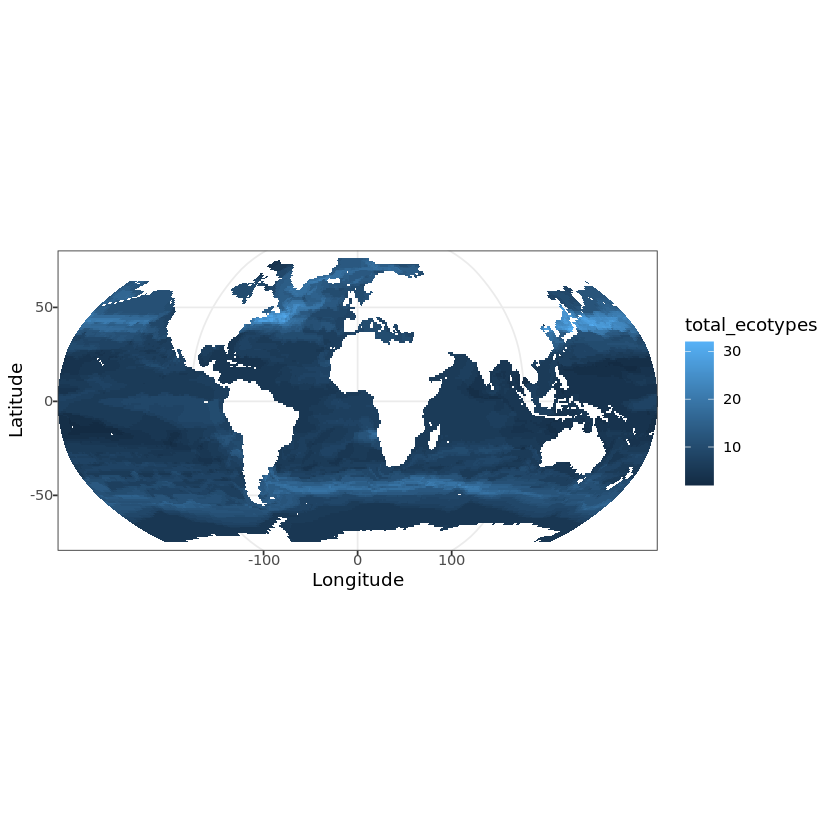

In [18]:
ggplot(get_topts_higher_biomass %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(total_ecotypes=length(LowIntercept)))+# %>%
    #dplyr::filter((Latitude>10)&(Latitude<40)&(Longitude>-155)&(Longitude< -145)))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=total_ecotypes)) + theme_bw()+ coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")

In [91]:
get_topts_higher_biomass %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::filter(length(LowIntercept)>3) %>%
    dplyr::summarize(shap_test_low = shapiro.test(LowIntercept)$p.value,
                     shap_test_high = shapiro.test(HighIntercept)$p.value) %>%
    dplyr::arrange(shap_test_low)

`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.


Latitude Longitude shap_test_low shap_test_high
1      47.5    -59.5     0.04175571    0.3137499     
2      46.5    -61.5     0.07612237    0.2092920     
3      47.5    -60.5     0.12904690    0.4165816     
4      34.5    123.5     0.17962500    0.5070062     
5      35.5    124.5     0.17962500    0.5070062     
6      35.5    125.5     0.17962500    0.5070062     
7      40.5    -68.5     0.18324035    0.8091030     
8      34.5    120.5     0.18409870    0.4429153     
9      35.5    120.5     0.18409870    0.4429153     
10     36.5    121.5     0.18409870    0.4429153     
11     36.5    122.5     0.18409870    0.4429153     
12     38.5    132.5     0.22297285    0.8343104     
13     38.5    133.5     0.22297285    0.8343104     
14     34.5    121.5     0.23265830    0.5097718     
15     35.5    121.5     0.23265830    0.5097718     
16     44.5    -48.5     0.23386063    0.3808994     
17    -39.5    -52.5     0.23439079    0.6273567     
18    -36.5    -54.5     0.23439079    0.6273567     
19     46.5    -46.5     0.23456014    0.3885706     
20     36.5    123.5     0.24736886    0.5499370     
21     42.5    -48.5     0.24741898    0.8027754     
22     38.5    129.5     0.24863397    0.8339854     
23     38.5    130.5     0.24863397    0.8339854     
24     38.5    131.5     0.24863397    0.8339854     
25     43.5    -51.5     0.25017879    0.2501788     
26     44.5    -49.5     0.25017879    0.2501788     
27     45.5    -50.5     0.25017879    0.2501788     
28     45.5    -47.5     0.25017879    0.2501788     
29     34.5    122.5     0.26075723    0.5909015     
30     35.5    122.5     0.26075723    0.5909015     
⋮     ⋮        ⋮         ⋮             ⋮             
35836  36.5    -157.5    0.9997958     0.9896566     
35837  37.5     167.5    0.9997958     0.9896566     
35838 -41.5     -62.5    0.9999091     0.9821918     
35839 -51.5     130.5    0.9999339     0.9640955     
35840 -51.5     131.5    0.9999339     0.9640955     
35841 -51.5     132.5    0.9999339     0.9640955     
35842  43.5    -157.5    0.9999597     0.8462870     
35843  47.5     160.5    0.9999597     0.8462870     
35844 -42.5      21.5    0.9999719     0.9948167     
35845 -51.5     127.5    0.9999922     0.9401967     
35846 -51.5     128.5    0.9999922     0.9401967     
35847 -51.5     129.5    0.9999922     0.9401967     
35848 -50.5     119.5    0.9999922     0.9401967     
35849 -50.5     120.5    0.9999922     0.9401967     
35850 -48.5     103.5    0.9999922     0.9401967     
35851 -46.5      69.5    0.9999922     0.9401967     
35852 -46.5      70.5    0.9999922     0.9401967     
35853 -45.5      50.5    0.9999922     0.9401967     
35854  46.5    -140.5    0.9999945     0.9728131     
35855  46.5    -139.5    0.9999945     0.9728131     
35856  46.5    -138.5    0.9999945     0.9728131     
35857  46.5    -137.5    0.9999945     0.9728131     
35858 -48.5     -35.5    0.9999990     0.9576152     
35859 -48.5     -34.5    0.9999990     0.9576152     
35860 -48.5     -33.5    0.9999990     0.9576152     
35861 -48.5     -32.5    0.9999990     0.9576152     
35862 -47.5     -14.5    0.9999990     0.9576152     
35863  44.5     -43.5    0.9999990     0.6095508     
35864  44.5     -42.5    0.9999990     0.6095508     
35865  45.5     -40.5    0.9999990     0.6095508

In [19]:
get_topts_higher_biomass %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::filter(length(LowIntercept)>3) %>%
    dplyr::summarize(shap_test_low = shapiro.test(LowIntercept)$p.value,
                     shap_test_high = shapiro.test(HighIntercept)$p.value) %>%
    dplyr::arrange(shap_test_high)

`summarise()` has grouped output by 'Latitude'. You
can override using the `.groups` argument.


Latitude Longitude shap_test_low shap_test_high
1     37.5     119.5     0.29035066    0.02419057    
2     39.5     119.5     0.55673075    0.03899964    
3     38.5     119.5     0.61409627    0.04132724    
4     38.5     118.5     0.40514600    0.04324448    
5     38.5     121.5     0.62831079    0.04334197    
6     39.5     123.5     0.80205179    0.04750907    
7     38.5     120.5     0.67929672    0.05895565    
8     38.5     124.5     0.84206153    0.06262868    
9     39.5     124.5     0.84206153    0.06262868    
10    38.5     123.5     0.68442780    0.07818425    
11    39.5     120.5     0.71986839    0.09401628    
12    38.5     122.5     0.59853112    0.09623242    
13    37.5     123.5     0.81096546    0.13287988    
14    46.5     -61.5     0.07612237    0.20929205    
15    45.5     -49.5     0.38089943    0.23386063    
16    45.5     -51.5     0.28535345    0.24611214    
17    46.5     -50.5     0.28535345    0.24611214    
18    46.5     -49.5     0.28535345    0.24611214    
19    43.5     -51.5     0.25017879    0.25017879    
20    44.5     -49.5     0.25017879    0.25017879    
21    45.5     -50.5     0.25017879    0.25017879    
22    45.5     -47.5     0.25017879    0.25017879    
23    41.5     136.5     0.41246512    0.25892349    
24    42.5     136.5     0.41246512    0.25892349    
25    43.5     137.5     0.41246512    0.25892349    
26    41.5     135.5     0.46596850    0.26152019    
27    42.5     137.5     0.46596850    0.26152019    
28    37.5     -71.5     0.58595703    0.27859595    
29    35.5     -75.5     0.40145952    0.28928658    
30    37.5     124.5     0.46375587    0.28944712    
⋮     ⋮        ⋮         ⋮             ⋮             
35836  56.5     -30.5    0.9979410     0.9979410     
35837  56.5     -29.5    0.9979410     0.9979410     
35838  56.5     -28.5    0.9979410     0.9979410     
35839  56.5     -27.5    0.9979410     0.9979410     
35840  57.5     -33.5    0.9979410     0.9979410     
35841  57.5     -32.5    0.9979410     0.9979410     
35842  57.5     -31.5    0.9979410     0.9979410     
35843  57.5     -30.5    0.9979410     0.9979410     
35844  57.5     -29.5    0.9979410     0.9979410     
35845  58.5     -31.5    0.9979410     0.9979410     
35846  67.5     -54.5    0.9979410     0.9979410     
35847 -19.5       6.5    0.9308120     0.9982108     
35848  47.5     143.5    0.9787589     0.9988535     
35849  48.5     143.5    0.9787589     0.9988535     
35850  48.5     144.5    0.9787589     0.9988535     
35851  48.5     145.5    0.9787589     0.9988535     
35852  69.5     -10.5    0.8338857     0.9993406     
35853  69.5      -9.5    0.8338857     0.9993406     
35854  69.5      -8.5    0.8338857     0.9993406     
35855  69.5      -7.5    0.8338857     0.9993406     
35856  69.5      -4.5    0.8338857     0.9993406     
35857  71.5       9.5    0.8338857     0.9993406     
35858  71.5      10.5    0.8338857     0.9993406     
35859  71.5      12.5    0.8338857     0.9993406     
35860 -54.5     -58.5    0.8829983     0.9994983     
35861 -51.5     133.5    0.9163623     0.9997715     
35862  36.5    -135.5    0.9163623     0.9997715     
35863  66.5     -13.5    0.9896566     0.9997958     
35864 -41.5     -94.5    0.9751951     0.9999334     
35865  71.5      25.5    0.9576152     0.9999990

In [11]:
## read in experimental Norberg params
## get x intercepts of experimental Norberg
experiment_widths=read.csv("../darwin-processing-scripts/num_coexisting_widths/all_params_experiments_15Dec_fromfinal-code-notebooks.csv") %>%
    dplyr::rowwise() %>%
    dplyr::mutate(LowIntercept=min(norberg_intercept(a,b,w,opt,TRUE),
                                   norberg_intercept(a,b,w,opt,FALSE)),
                  HighIntercept=max(norberg_intercept(a,b,w,opt,TRUE),
                                   norberg_intercept(a,b,w,opt,FALSE))) %>%
    dplyr::mutate(LowIntercept=case_when(Strain=="374" ~ 4,
                                         #Strain=="6071" ~ 1,
                                         TRUE ~ LowIntercept)) %>%
    tidyr::pivot_longer(cols=c("LowIntercept","HighIntercept"),
                        names_to="LowOrHigh",values_to="ExpIntercept")

get_topts_higher_biomass["key"] = "noval"


## merge modeled Topt values with experimental ones
all_means=get_topts_higher_biomass %>%
    tidyr::pivot_longer(cols=c("LowIntercept","HighIntercept"),
                        names_to="LowOrHigh",values_to="Intercept") %>%
    dplyr::group_by(Latitude,Longitude,LowOrHigh) %>% # Remove LowOrHigh to get a distribution of both values
    dplyr::summarize(MeanIntercept=mean(Intercept,na.rm=TRUE),
                     StdIntercept=sd(Intercept,na.rm=TRUE))%>%
    dplyr::mutate(StdIntercept=case_when(is.na(StdIntercept)~1,
                                        TRUE ~StdIntercept))

all_means["key"] = "noval"
merged_df_all = all_means %>% 
    dplyr::left_join(experiment_widths%>%dplyr::select(ExpIntercept,Strain,LowOrHigh))

`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.
Joining with `by =
join_by(LowOrHigh)`
Warning message in dplyr::left_join(., experiment_widths %>% dplyr::select(ExpIntercept, :
“Detected an unexpected
many-to-many relationship
between `x` and `y`.
ℹ Row 1 of `x` matches
  multiple rows in `y`.
ℹ Row 2 of `y` matches
  multiple rows in `x`.
ℹ If a many-to-many
  relationship is expected,
  set `relationship =
  "many-to-many"` to silence
  this warning.”


In [12]:
for_matrixfy = experiment_widths %>% tidyr::pivot_wider(id_cols = "Strain",
                                         names_from="LowOrHigh",
                                         values_from="ExpIntercept")
matrix_final = as.matrix(for_matrixfy %>% dplyr::select(LowIntercept,HighIntercept))

In [14]:
## bivariate normal distribution with correlation between the low and high intercepts
for_matrixfy = experiment_widths %>% tidyr::pivot_wider(id_cols = "Strain",
                                         names_from="LowOrHigh",
                                         values_from="ExpIntercept")
matrix_final = as.matrix(for_matrixfy %>% dplyr::select(LowIntercept,HighIntercept))

range_add=1.5
matrix_final_lower = as.matrix(for_matrixfy %>% dplyr::mutate(LowIntercept=LowIntercept-range_add,
                                                        HighIntercept=HighIntercept-range_add) %>%
                         dplyr::select(LowIntercept,HighIntercept))

matrix_final_upper = as.matrix(for_matrixfy %>% dplyr::mutate(LowIntercept=LowIntercept+range_add,
                                                        HighIntercept=HighIntercept+range_add) %>%
                         dplyr::select(LowIntercept,HighIntercept))

## pdf approach with nnspat
merged_df_all_bivar = get_topts_higher_biomass  %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(pdf_prob = paste(bvnorm.pdf(matrix_final, mu = c(mean(LowIntercept), mean(HighIntercept)),
                                s1 = sd(LowIntercept), s2 = sd(HighIntercept), 
                                rho = cor(LowIntercept,HighIntercept)),collapse="_"))%>%
    tidyr::separate(pdf_prob,into=as.character(paste0("Strain_",for_matrixfy$Strain)),sep="_") %>%
    tidyr::pivot_longer(cols=starts_with("Strain_"),names_to="Strain",values_to="Probability")

## cdf approach within 1.5oC with VGAM
merged_df_all_bivar = get_topts_higher_biomass  %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(pdf_prob = paste(abs(pbinorm(matrix_final_upper[,1], matrix_final_upper[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept),
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.01)-
                                      pbinorm(matrix_final_lower[,1], matrix_final_lower[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept), 
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.01)),collapse="_"))%>%
    tidyr::separate(pdf_prob,into=as.character(paste0("Strain_",for_matrixfy$Strain)),sep="_") %>%
    tidyr::pivot_longer(cols=starts_with("Strain_"),names_to="Strain",values_to="Probability")

`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.
`summarise()` has grouped
output by 'Latitude'. You can
override using the `.groups`
argument.


In [151]:
matrix_final_lower

LowIntercept HighIntercept
 [1,]  2.500000    25.53228     
 [2,]  4.428361    29.18660     
 [3,] 11.024536    32.93876     
 [4,]  5.577876    29.67394     
 [5,]  4.611066    27.51994     
 [6,]  5.071991    27.92097     
 [7,]  7.441014    30.16891     
 [8,]  6.242970    28.20632     
 [9,] 10.297739    27.00095     
[10,]  7.397609    30.60457     
[11,] -7.670076    19.53652     
[12,]  6.058489    30.57863

In [152]:
matrix_final_upper

LowIntercept HighIntercept
 [1,]  5.500000    28.53228     
 [2,]  7.428361    32.18660     
 [3,] 14.024536    35.93876     
 [4,]  8.577876    32.67394     
 [5,]  7.611066    30.51994     
 [6,]  8.071991    30.92097     
 [7,] 10.441014    33.16891     
 [8,]  9.242970    31.20632     
 [9,] 13.297739    30.00095     
[10,] 10.397609    33.60457     
[11,] -4.670076    22.53652     
[12,]  9.058489    33.57863

Warning message:
“Returning more (or less) than
1 row per `summarise()` group
was deprecated in dplyr 1.1.0.
ℹ Please use `reframe()`
  instead.
ℹ When switching from
  `summarise()` to
  `reframe()`, remember that
  `reframe()` always returns
  an ungrouped data frame and
  adjust accordingly.”
`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.


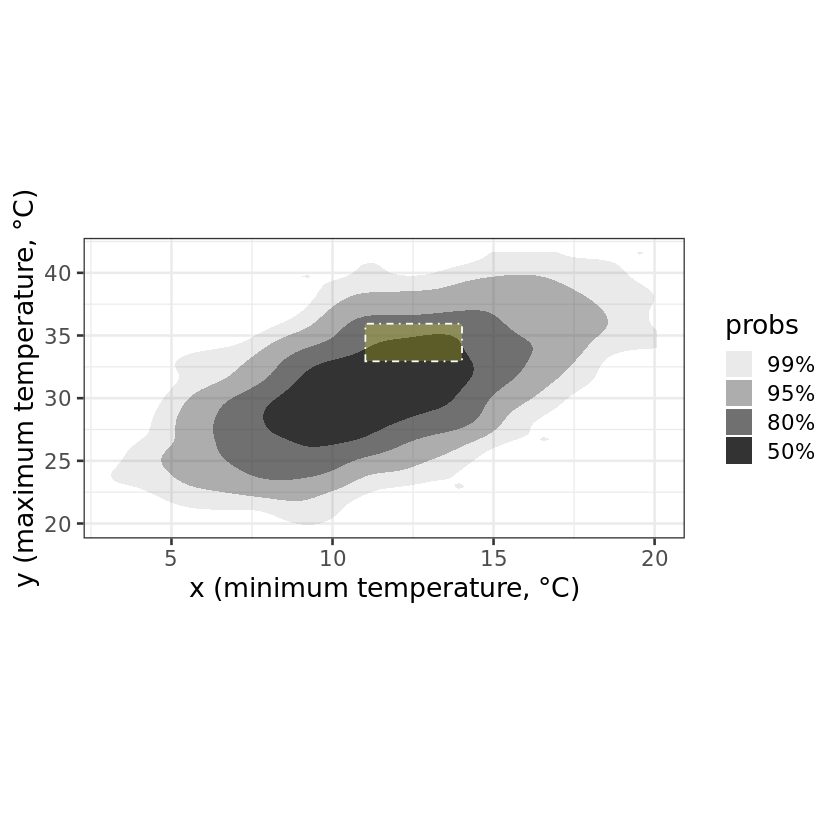

In [185]:
random_nums = get_topts_higher_biomass %>%
    dplyr::filter((Longitude==20.5)&(Latitude==35.5)) %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(gen_nums = rbinorm(1000, mean1 = mean(LowIntercept), 
                      mean2 = mean(HighIntercept), 
                      var1 = var(LowIntercept),
                      var2 = var(HighIntercept), 
                      cov12 = cov(LowIntercept,HighIntercept)-
                      sign(cov(LowIntercept,HighIntercept))*0.01))

to_plot = data.frame(x=random_nums$gen_nums[,1],y=random_nums$gen_nums[,2])
p <- ggplot(to_plot, aes(x, y)) + coord_equal() + geom_hdr() +
    theme_bw(base_size=16)+theme(aspect.ratio=1/2) + 
    annotate("rect", xmin = 11.02, xmax = 14.02, ymin = 32.94, ymax = 35.94, alpha=0.2, fill="yellow",
             linetype="dotdash",color="white") + xlab("x (minimum temperature, °C)")+ 
    ylab("y (maximum temperature, °C)")

ggsave("distribution_tester.pdf",width=8,height=4,units="in")

p

In [72]:
## cdf approach within 1.5oC with VGAM,separate by months
merged_df_all_bivar_keep_times = get_topts_higher_biomass_keep_times  %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>%
    dplyr::summarize(pdf_prob = paste(abs(pbinorm(matrix_final_upper[,1], matrix_final_upper[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept),
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.01)-
                                      pbinorm(matrix_final_lower[,1], matrix_final_lower[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept), 
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.01)),collapse="_"))%>%
    tidyr::separate(pdf_prob,into=as.character(paste0("Strain_",for_matrixfy$Strain)),sep="_") %>%
    tidyr::pivot_longer(cols=starts_with("Strain_"),names_to="Strain",values_to="Probability")

`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.


`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.


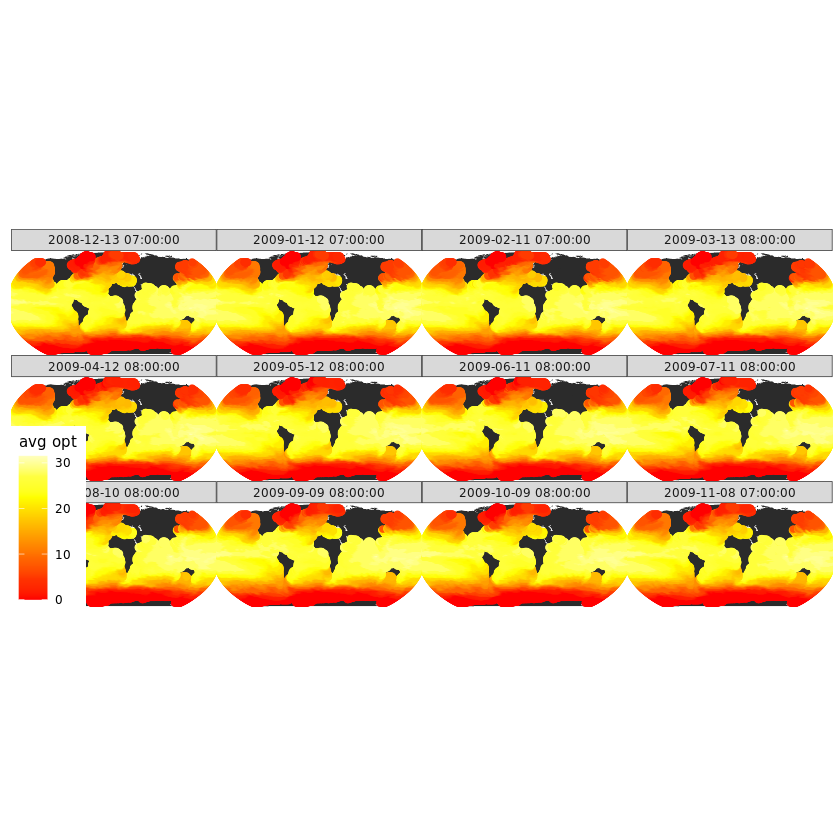

In [41]:
gg + geom_point(data=get_topts_higher_biomass_keep_times %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>%
    dplyr::summarize(opt=mean(opt))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180),
    aes(x=Longitude, y = Latitude, color = opt)) + 
    scale_color_gradientn(colours = heat.colors(8),
                         na.value="transparent",name="avg opt") + 
    facet_wrap(~DateTime)

`summarise()` has grouped
output by 'Latitude',
'Longitude'. You can override
using the `.groups` argument.
Warning message in geom_tile(aes(x = Longitude, y = Latitude, fill = opt), color = "black", :
“Ignoring unknown parameters:
`na.value`”


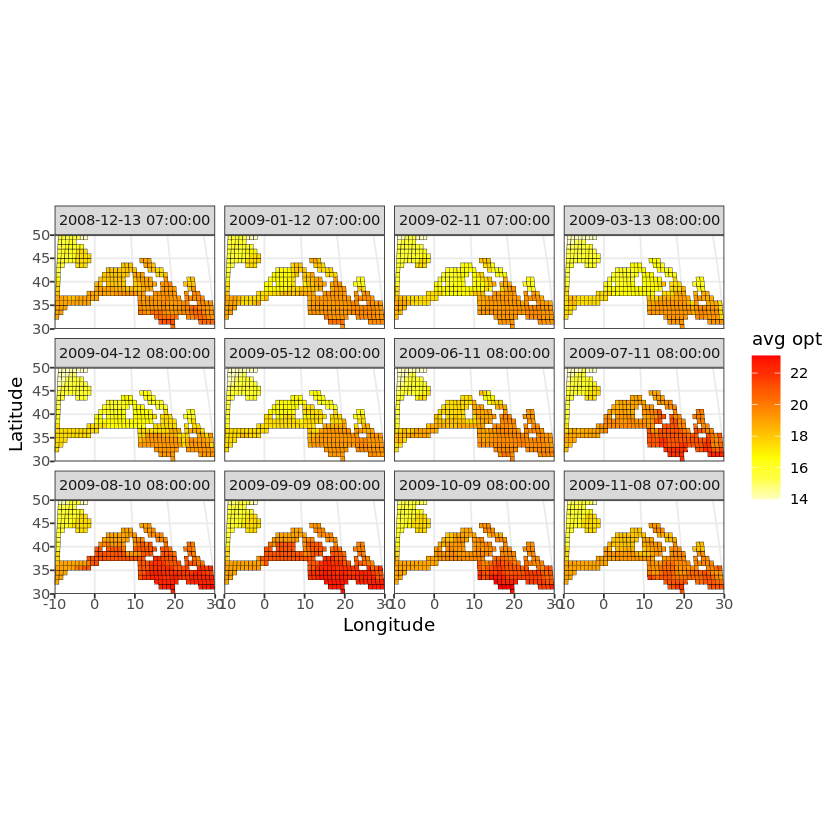

In [61]:
ggplot(get_topts_higher_biomass_keep_times %>%
    dplyr::group_by(Latitude,Longitude,DateTime) %>%
    dplyr::summarize(opt=mean(opt))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180)%>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30)))+
    geom_tile(aes(x=Longitude,y=Latitude,fill=opt),color="black",na.value="gray") + 
    scale_fill_gradientn(colours = rev(heat.colors(8)),
                         na.value="transparent",name="avg opt") + 
    theme_bw()+ 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50)) + facet_wrap(~DateTime)

In [28]:
head(merged_df_all_bivar_keep_times %>% dplyr::filter((Latitude==-29.5)&(Longitude==-99.5)&(Strain=="Strain_3492")))

Latitude Longitude DateTime            Strain      Probability      
1 -29.5    -99.5     2008-12-13 07:00:00 Strain_3492 0.388431427642347
2 -29.5    -99.5     2009-01-12 07:00:00 Strain_3492 0.965998312224187
3 -29.5    -99.5     2009-02-11 07:00:00 Strain_3492 0.414968427209384
4 -29.5    -99.5     2009-03-13 08:00:00 Strain_3492 0.393780887040782
5 -29.5    -99.5     2009-04-12 08:00:00 Strain_3492 0.359413872434583
6 -29.5    -99.5     2009-05-12 08:00:00 Strain_3492 0.359413872434583

Joining with `by =
join_by(Strains)`
Warning message:
“Duplicated aesthetics after
name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x
and y”
Coordinate system already
present. Adding new coordinate
system, which will replace the
existing one.


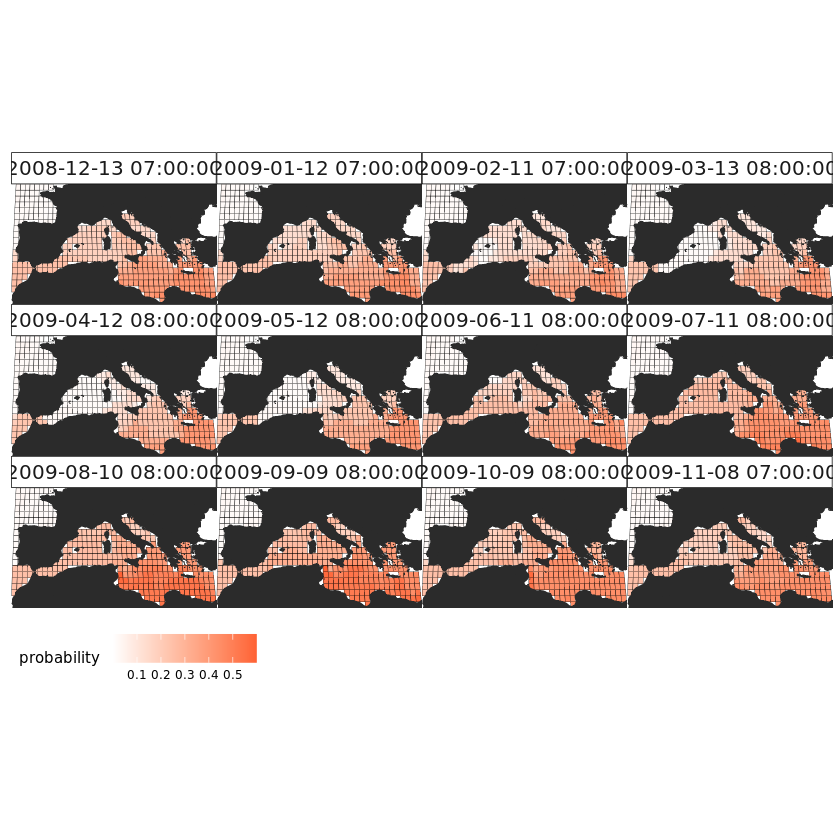

In [198]:
strain="Strain_3492"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_3492=gg + geom_tile(data=merged_df_all_bivar_keep_times %>% 
    dplyr::mutate(DateTime=as.character(DateTime)) %>%
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=as.numeric(Probability))%>%#,Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30))%>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, fill = Probability),color="black") + 
    scale_fill_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    #scale_color_gradient(low="white",high="#5A5A5A",
    #                     na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~DateTime)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 12),strip.background = element_rect( colour="black", fill="white" )) + 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50))
strain_3492

ggsave("strain_3492_probs.pdf",width=10,height=8,units="in")

Joining with `by =
join_by(Strains)`
Warning message:
“Duplicated aesthetics after
name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x
and y”
Coordinate system already
present. Adding new coordinate
system, which will replace the
existing one.


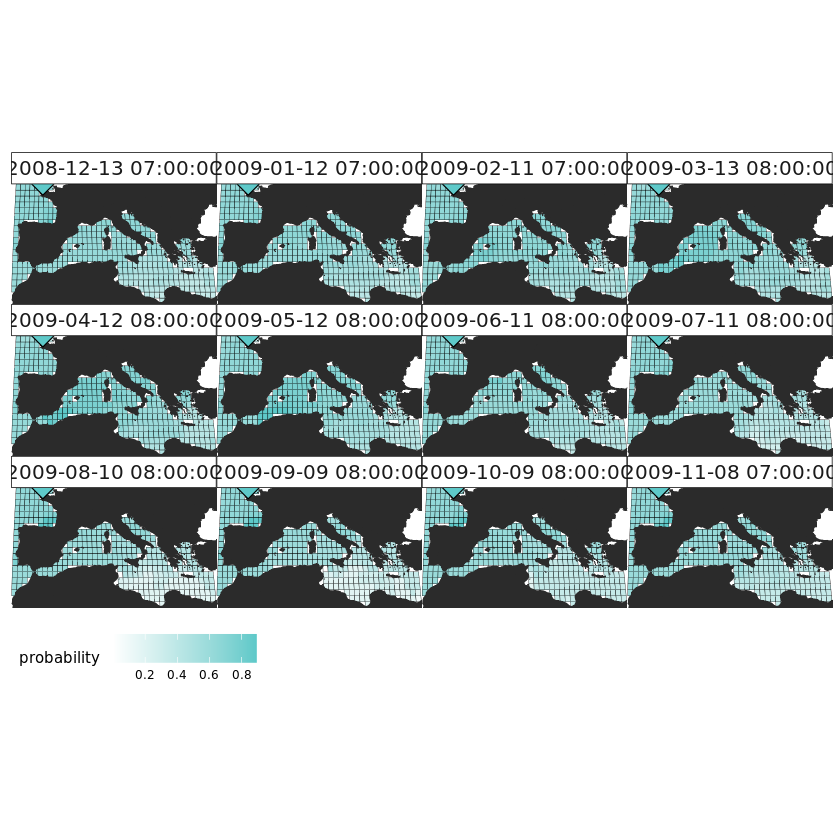

In [118]:
strain="Strain_379"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_379=gg + geom_tile(data=merged_df_all_bivar_keep_times %>% 
    dplyr::mutate(DateTime=as.character(DateTime)) %>%
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30))%>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, fill = Probability),color="black") + 
    scale_fill_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    #scale_color_gradient(low="white",high="#5A5A5A",
    #                     na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~DateTime)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 12),strip.background = element_rect( colour="black", fill="white" )) + 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50))
strain_379

Joining with `by =
join_by(Strains)`
Warning message:
“Duplicated aesthetics after
name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x
and y”
Coordinate system already
present. Adding new coordinate
system, which will replace the
existing one.


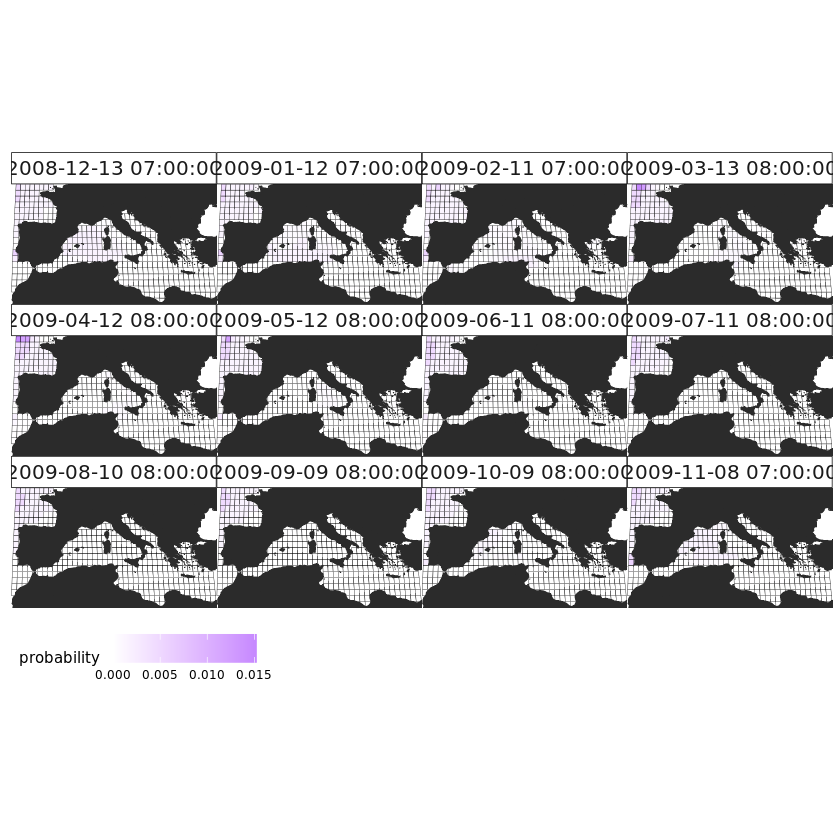

In [70]:
strain="Strain_6071"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_6071=gg + geom_tile(data=merged_df_all_bivar_keep_times %>% 
    dplyr::mutate(DateTime=as.character(DateTime)) %>%
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::filter((Latitude>30)&(Latitude<50)&(Longitude>-10)&(Longitude<30))%>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, fill = Probability),color="black") + 
    scale_fill_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    #scale_color_gradient(low="white",high="#5A5A5A",
    #                     na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~DateTime)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 12),strip.background = element_rect( colour="black", fill="white" )) + 
    coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs",
              xlim=c(-10,30),ylim=c(30,50))
strain_6071

In [18]:
merged_df_all_bivar_keep_times %>% dplyr::arrange(desc(as.numeric(Probability)))

Latitude Longitude DateTime            Strain      Probability      
1       -29.5     -99.5    2009-01-12 07:00:00 Strain_3492 0.965998312224187
2       -29.5     -98.5    2009-01-12 07:00:00 Strain_3492 0.965998312224187
3       -29.5     -98.5    2009-02-11 07:00:00 Strain_3492 0.965998312224187
4       -29.5     -97.5    2009-01-12 07:00:00 Strain_3492 0.965998312224187
5       -29.5     -97.5    2009-02-11 07:00:00 Strain_3492 0.965998312224187
6       -29.5     -96.5    2009-01-12 07:00:00 Strain_3492 0.965998312224187
7       -28.5     -99.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
8       -28.5     -98.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
9       -28.5     -98.5    2009-01-12 07:00:00 Strain_3492 0.965998312224187
10      -28.5     -97.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
11      -27.5     -99.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
12      -27.5     -98.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
13      -27.5     -97.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
14      -26.5    -100.5    2009-11-08 07:00:00 Strain_3492 0.965998312224187
15      -26.5     -99.5    2008-12-13 07:00:00 Strain_3492 0.965998312224187
16      -34.5     136.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
17      -33.5     124.5    2009-01-12 07:00:00 Strain_2090 0.965483902561719
18      -33.5     124.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
19      -33.5     124.5    2009-03-13 08:00:00 Strain_2090 0.965483902561719
20      -33.5     124.5    2009-04-12 08:00:00 Strain_2090 0.965483902561719
21      -33.5     125.5    2009-01-12 07:00:00 Strain_2090 0.965483902561719
22      -33.5     125.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
23      -33.5     126.5    2009-01-12 07:00:00 Strain_2090 0.965483902561719
24      -33.5     126.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
25      -33.5     127.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
26      -32.5     125.5    2009-01-12 07:00:00 Strain_2090 0.965483902561719
27      -32.5     125.5    2009-02-11 07:00:00 Strain_2090 0.965483902561719
28      -32.5     125.5    2009-03-13 08:00:00 Strain_2090 0.965483902561719
29      -32.5     125.5    2009-04-12 08:00:00 Strain_2090 0.965483902561719
30      -32.5     126.5    2009-01-12 07:00:00 Strain_2090 0.965483902561719
⋮       ⋮        ⋮         ⋮                   ⋮           ⋮                
5299171 79.5      3.5      2009-04-12 08:00:00 Strain_3492 0                
5299172 79.5      3.5      2009-05-12 08:00:00 Strain_3492 0                
5299173 79.5      3.5      2009-06-11 08:00:00 Strain_3492 0                
5299174 79.5      3.5      2009-07-11 08:00:00 Strain_3492 0                
5299175 79.5      4.5      2009-04-12 08:00:00 Strain_3492 0                
5299176 79.5      4.5      2009-05-12 08:00:00 Strain_3492 0                
5299177 79.5      4.5      2009-06-11 08:00:00 Strain_3492 0                
5299178 79.5      4.5      2009-07-11 08:00:00 Strain_3492 0                
5299179 79.5      5.5      2009-04-12 08:00:00 Strain_3492 0                
5299180 79.5      5.5      2009-05-12 08:00:00 Strain_3492 0                
5299181 79.5      5.5      2009-06-11 08:00:00 Strain_3492 0                
5299182 79.5      5.5      2009-07-11 08:00:00 Strain_3492 0                
5299183 79.5      6.5      2009-04-12 08:00:00 Strain_3492 0                
5299184 79.5      6.5      2009-05-12 08:00:00 Strain_3492 0                
5299185 79.5      6.5      2009-06-11 08:00:00 Strain_3492 0                
5299186 79.5      6.5      2009-07-11 08:00:00 Strain_3492 0                
5299187 79.5      7.5      2009-04-12 08:00:00 Strain_3492 0                
5299188 79.5      7.5      2009-05-12 08:00:00 Strain_3492 0                
5299189 79.5      7.5      2009-06-11 08:00:00 Strain_3492 0                
5299190 79.5      7.5      2009-07-11 08:00:00 Strain_3492 0                
5299

In [15]:
merged_df_all_bivar %>% dplyr::arrange(desc(as.numeric(Probability)))

Latitude Longitude Strain      Probability      
1      -23.5    -96.5     Strain_3492 0.815525069099475
2      -38.5    -75.5     Strain_374  0.755210060829218
3      -38.5    -74.5     Strain_374  0.755210060829218
4      -29.5    -81.5     Strain_1212 0.599275567353078
5      -24.5      8.5     Strain_1212 0.599275567353078
6      -24.5      9.5     Strain_1212 0.599275567353078
7      -40.5    -75.5     Strain_374  0.592646284468267
8      -40.5    -74.5     Strain_374  0.592646284468267
9      -39.5    -76.5     Strain_374  0.592646284468267
10     -39.5    -75.5     Strain_374  0.592646284468267
11     -39.5    -74.5     Strain_374  0.592646284468267
12     -39.5    -73.5     Strain_374  0.592646284468267
13     -40.5    173.5     Strain_1516 0.585810827689104
14     -40.5    174.5     Strain_1516 0.585810827689104
15     -39.5    172.5     Strain_1516 0.585810827689104
16     -39.5    173.5     Strain_1516 0.585810827689104
17     -40.5    173.5     Strain_914  0.58458906357174 
18     -40.5    174.5     Strain_914  0.58458906357174 
19     -39.5    172.5     Strain_914  0.58458906357174 
20     -39.5    173.5     Strain_914  0.58458906357174 
21     -40.5    173.5     Strain_379  0.575826563656839
22     -40.5    174.5     Strain_379  0.575826563656839
23     -39.5    172.5     Strain_379  0.575826563656839
24     -39.5    173.5     Strain_379  0.575826563656839
25     -28.5    -82.5     Strain_1212 0.560505211639739
26     -28.5    -81.5     Strain_1212 0.560505211639739
27     -28.5    -80.5     Strain_1212 0.560505211639739
28     -27.5    -83.5     Strain_1212 0.560505211639739
29     -27.5    -82.5     Strain_1212 0.560505211639739
30     -27.5    -81.5     Strain_1212 0.560505211639739
⋮      ⋮        ⋮         ⋮           ⋮                
441571 77.5     -72.5     Strain_3963 0                
441572 77.5     -72.5     Strain_3492 0                
441573 77.5     -72.5     Strain_1516 0                
441574 77.5     -72.5     Strain_874  0                
441575 77.5     -72.5     Strain_375  0                
441576 77.5     -72.5     Strain_2090 0                
441577 77.5     -72.5     Strain_379  0                
441578 77.5     -72.5     Strain_1212 0                
441579 77.5     -72.5     Strain_371  0                
441580 77.5     -72.5     Strain_914  0                
441581 78.5     -74.5     Strain_3963 0                
441582 78.5     -74.5     Strain_3492 0                
441583 78.5     -74.5     Strain_1516 0                
441584 78.5     -74.5     Strain_874  0                
441585 78.5     -74.5     Strain_375  0                
441586 78.5     -74.5     Strain_2090 0                
441587 78.5     -74.5     Strain_379  0                
441588 78.5     -74.5     Strain_1212 0                
441589 78.5     -74.5     Strain_371  0                
441590 78.5     -74.5     Strain_914  0                
441591 78.5     -73.5     Strain_3963 0                
441592 78.5     -73.5     Strain_3492 0                
441593 78.5     -73.5     Strain_1516 0                
441594 78.5     -73.5     Strain_874  0                
441595 78.5     -73.5     Strain_375  0                
441596 78.5     -73.5     Strain_2090 0                
441597 78.5     -73.5     Strain_379  0                
441598 78.5     -73.5     Strain_1212 0                
441599 78.5     -73.5     Strain_371  0                
441600 78.5     -73.5     Strain_914  0

In [11]:
merged_df_all_bivar_check = get_topts_higher_biomass  %>%
    dplyr::group_by(Latitude,Longitude) %>%
    dplyr::summarize(pdf_prob_up = paste(pbinorm(matrix_final_upper[,1], matrix_final_upper[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept),
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.0001),collapse="_"),
                    pdf_prob_low = paste(pbinorm(matrix_final_lower[,1], matrix_final_lower[,2], 
                                              mean1 = mean(LowIntercept), 
                                              mean2 = mean(HighIntercept), 
                                              var1 = var(LowIntercept),
                                              var2 = var(HighIntercept),
                                              cov12 = cov(LowIntercept,HighIntercept)-
                                              sign(cov(LowIntercept,HighIntercept))*0.0001),collapse="_"),
                    meanlow=mean(LowIntercept),
                    meanup=mean(HighIntercept),varlow=var(LowIntercept),varhigh=var(HighIntercept))

`summarise()` has grouped output by
'Latitude'. You can override using
the `.groups` argument.


In [12]:
counted_strains=merged_df_all_bivar %>% dplyr::filter(as.numeric(Probability) > 0.05) %>%
    dplyr::distinct(Strain,Latitude,Longitude) %>%
    dplyr::group_by(Latitude,Longitude) %>% 
    dplyr::summarize(NumStrains = length(unique(Strain)),
                     ListStrains = paste0(sort(Strain),collapse="_")) %>%
    dplyr::arrange(desc(NumStrains))

`summarise()` has grouped output by
'Latitude'. You can override using
the `.groups` argument.


Joining with `by =
join_by(Strains)`
Warning message:
“Duplicated aesthetics after
name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x
and y”


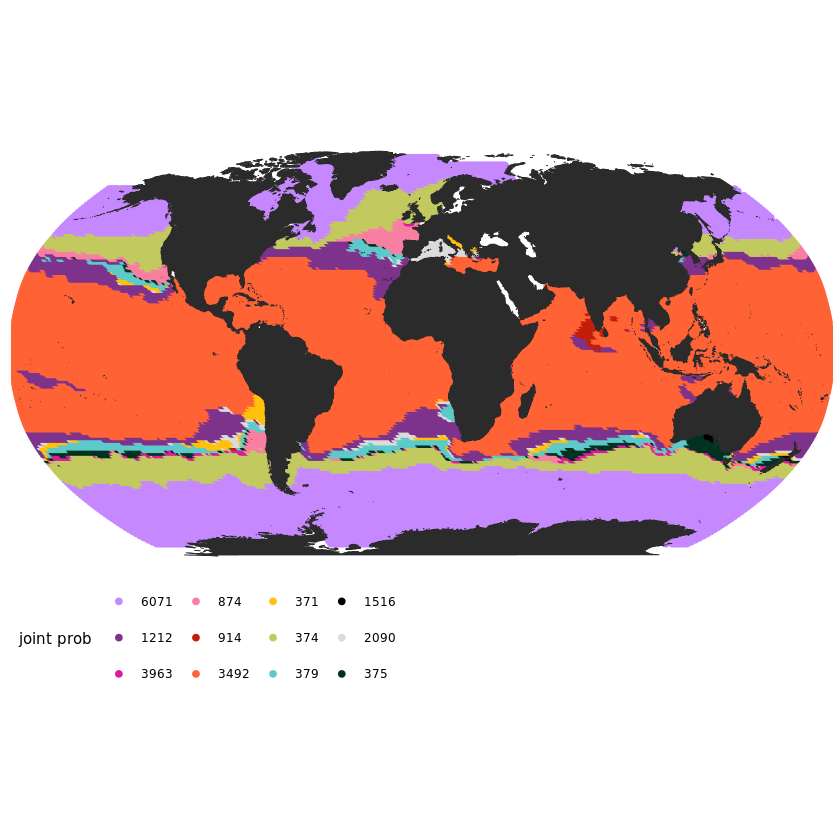

In [345]:
strain_all=gg + geom_point(data=merged_df_all_bivar %>% 
                           tidyr::separate(Strain,into=c("extra","Strain")) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=as.numeric(Probability)) %>%
    dplyr::group_by(Latitude,Longitude) %>%
    arrange(desc(Probability)) %>% 
    slice(1) %>%
    #dplyr::filter(Probability==max(Probability)) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color=factor(Strain))) + 
    scale_color_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                       values=strain_color_frame_harriet$Colors,
                         na.value="black",name="joint prob")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA)+
    #geom_jitter(data=color_frame %>% dplyr::filter(Strains%in%unique(merged_df_all_plot$Strain))%>%
    #dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180),
    #           aes(y=Latitude,x=Longitude,
    #           fill=Strains),pch=23,
    #           color="white",size=5) +
    scale_fill_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                       values=strain_color_frame_harriet$Colors,
                         na.value="black",name="joint prob")+
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_all

Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


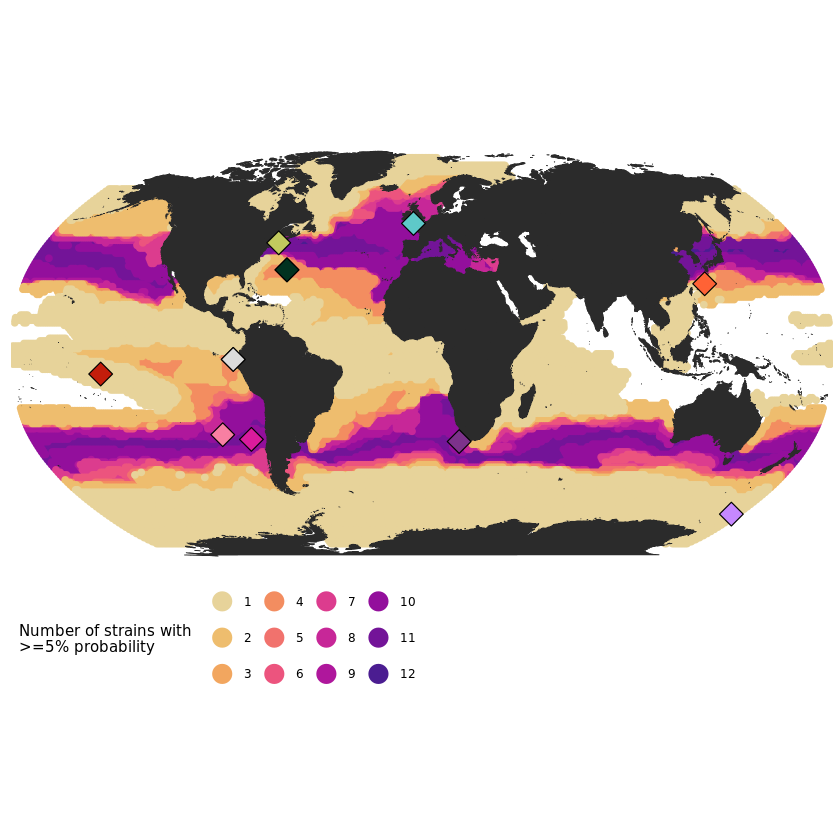

In [26]:
map_overlap_teal_bivar = gg + geom_point(data=counted_strains %>% 
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180),
    aes(x=Longitude, y = Latitude, color = factor(NumStrains))) + 
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) + 
    scale_color_manual(values=rev(hcl.colors(palette = "ag_Sunset",n=12)),name="Number of strains with\n>=5% probability")+ 
    guides(color = guide_legend(override.aes = list(size = 5)))+
    geom_point(data=color_frame %>% dplyr::filter(Strains%in%merged_df_all$Strain) %>%
                   dplyr::distinct(Strains,Latitude,Longitude,Colors),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame %>% dplyr::filter(Strains%in%merged_df_all$Strain)%>%
                     dplyr::distinct(Strains,Latitude,Longitude,Colors))$Colors,
               color="black",size=5) +
    theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
map_overlap_teal_bivar

`summarise()` has grouped output by
'Latitude'. You can override using
the `.groups` argument.
Warning message:
“Removed 8 rows containing non-finite
outside the scale range
(`stat_count()`).”
Saving 6.67 x 6.67 in image
Warning message:
“Removed 8 rows containing non-finite
outside the scale range
(`stat_count()`).”


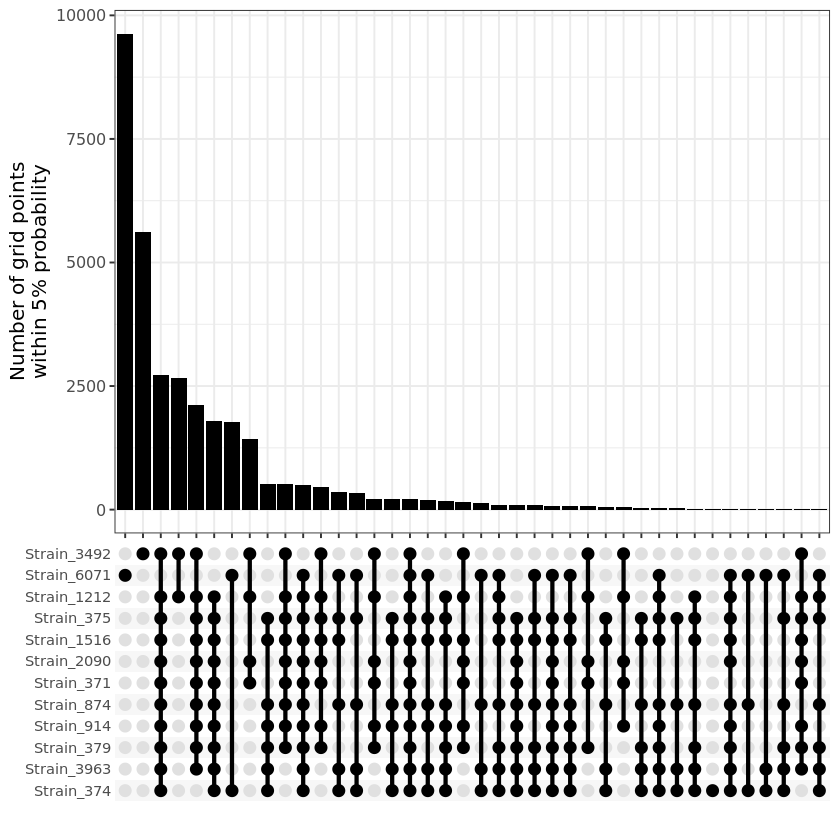

In [14]:
upset_plot_strains = merged_df_all_bivar %>% dplyr::filter(as.numeric(Probability) > 0.05) %>%
    dplyr::distinct(Strain,Latitude,Longitude) %>%
    dplyr::group_by(Latitude,Longitude) %>% 
    dplyr::summarize(NumStrains = length(unique(Strain)),
                     ListStrains = list(unique(as.character(Strain)))) %>%
    dplyr::arrange(desc(NumStrains))%>%
  ggplot(aes(x=ListStrains)) +
    geom_bar(fill="black") +
    scale_x_upset(n_intersections = 40) + ylab("Number of grid points\nwithin 5% probability") + 
    xlab("") + theme_bw(base_size=12)
upset_plot_strains

ggsave(plot=upset_plot_strains,"../../figures/supplemental/upset_plot_strains.png",dpi=400)

Joining with `by = join_by(Strains)`
Scale for colour is already present.
Adding another scale for colour, which will replace
the existing scale.
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


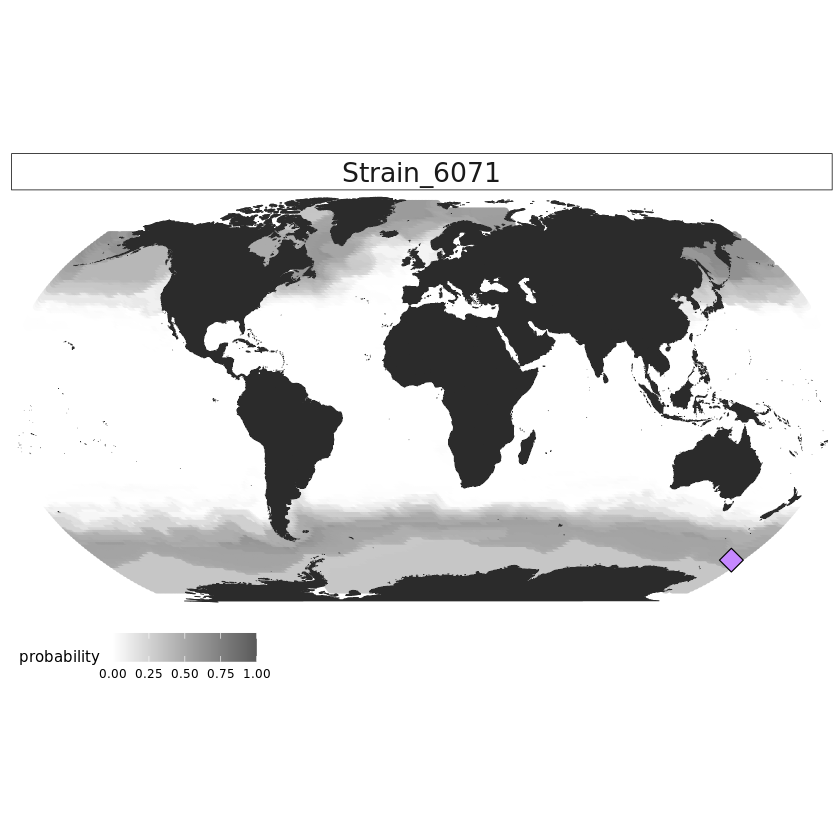

In [54]:
strain="Strain_6071"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_6071=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    scale_color_gradient(low="white",high="#5A5A5A",
                         na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_6071

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


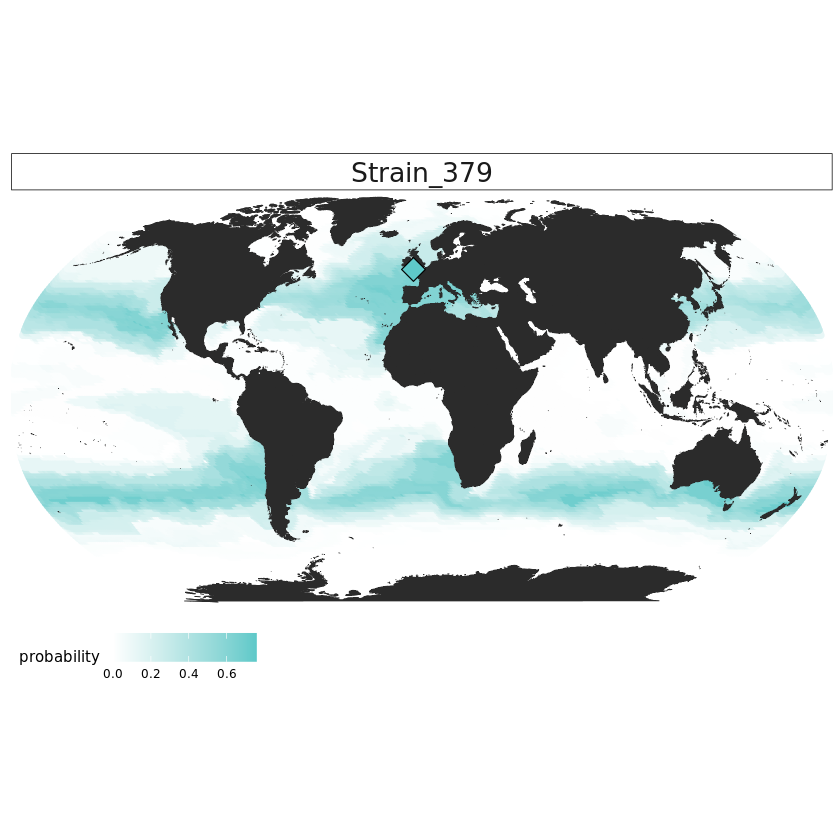

In [29]:
strain="Strain_379"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_379=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_379

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


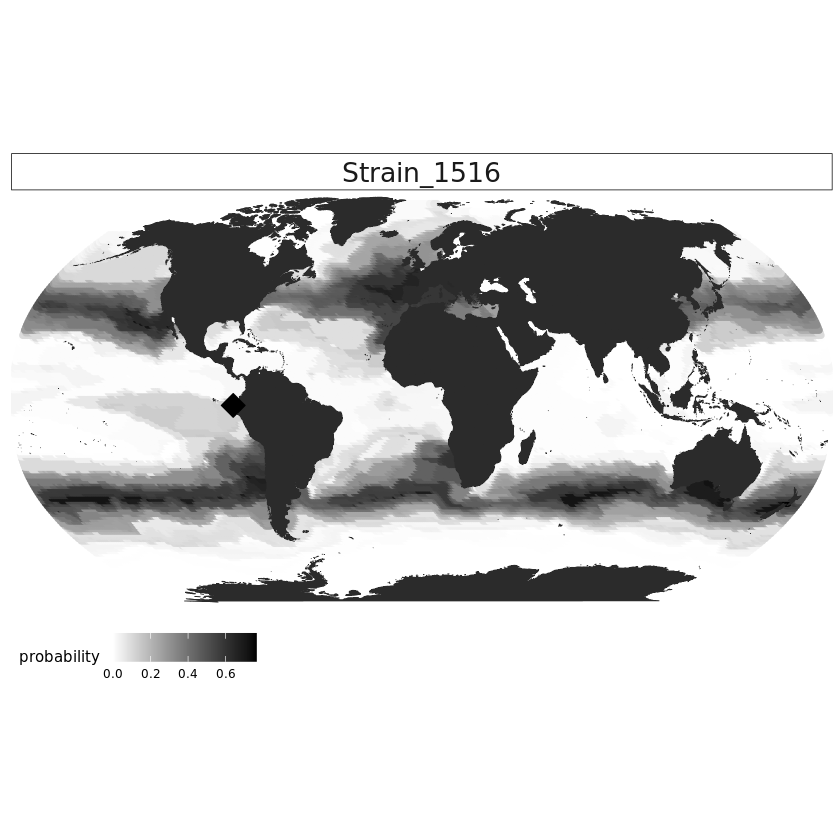

In [30]:
strain="Strain_1516"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_1516=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_1516

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


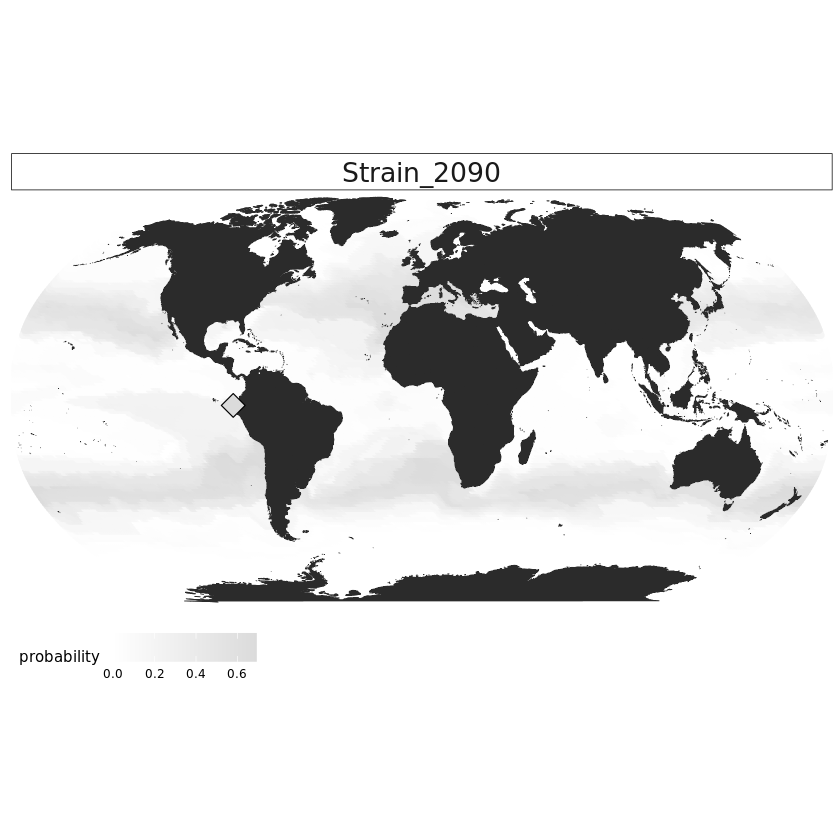

In [31]:
strain="Strain_2090"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_2090=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_2090

Joining with `by = join_by(Strains)`
Scale for colour is already present.
Adding another scale for colour, which will replace
the existing scale.
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


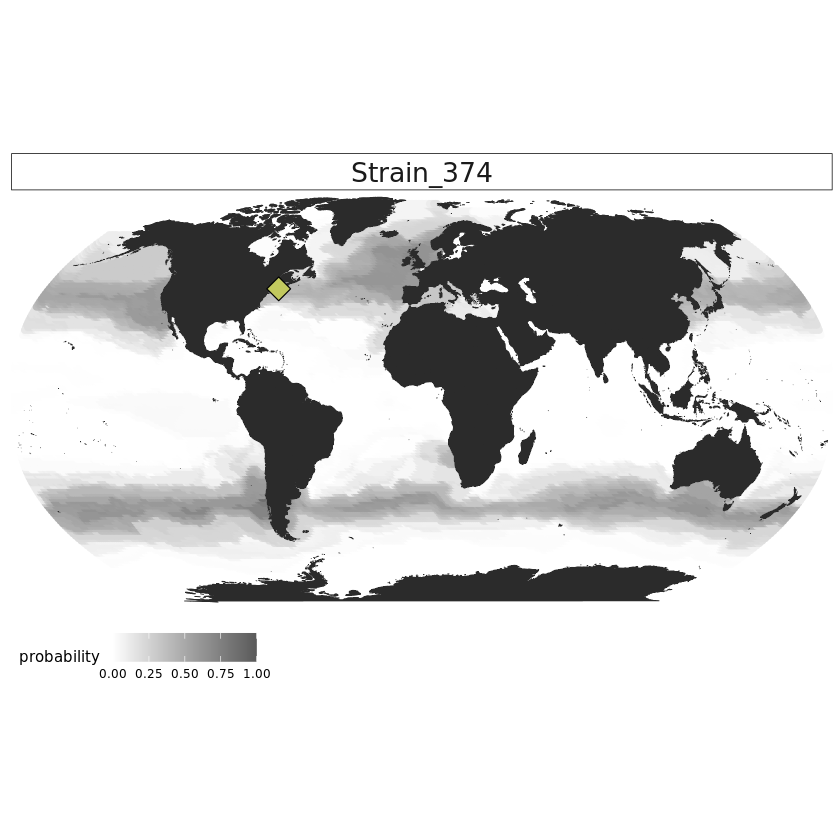

In [57]:
strain="Strain_374"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_374=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    scale_color_gradient(low="white",high="#5A5A5A",
                         na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_374

Joining with `by = join_by(Strains)`
Scale for colour is already present.
Adding another scale for colour, which will replace
the existing scale.
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


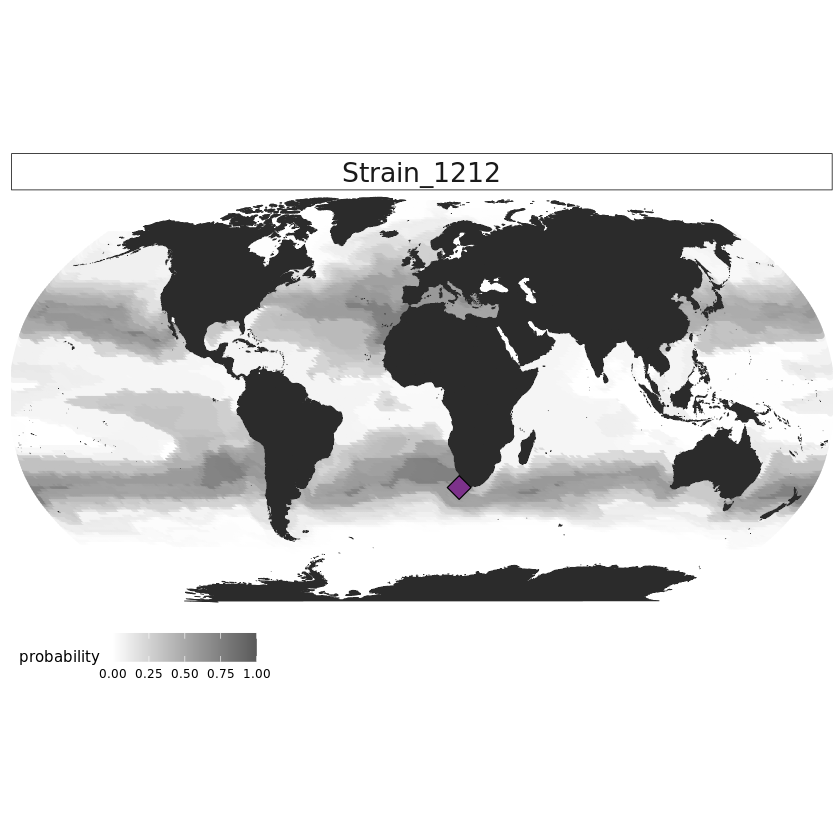

In [55]:
strain="Strain_1212"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_1212=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    scale_color_gradient(low="white",high="#5A5A5A",
                         na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_1212

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


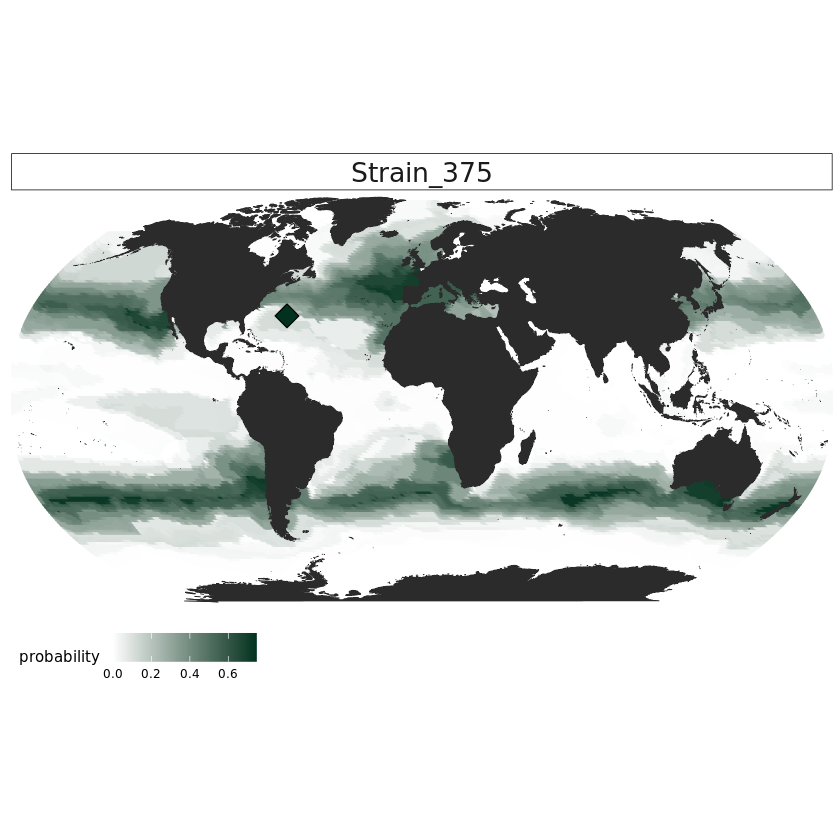

In [34]:
strain="Strain_375"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_375=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_375

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


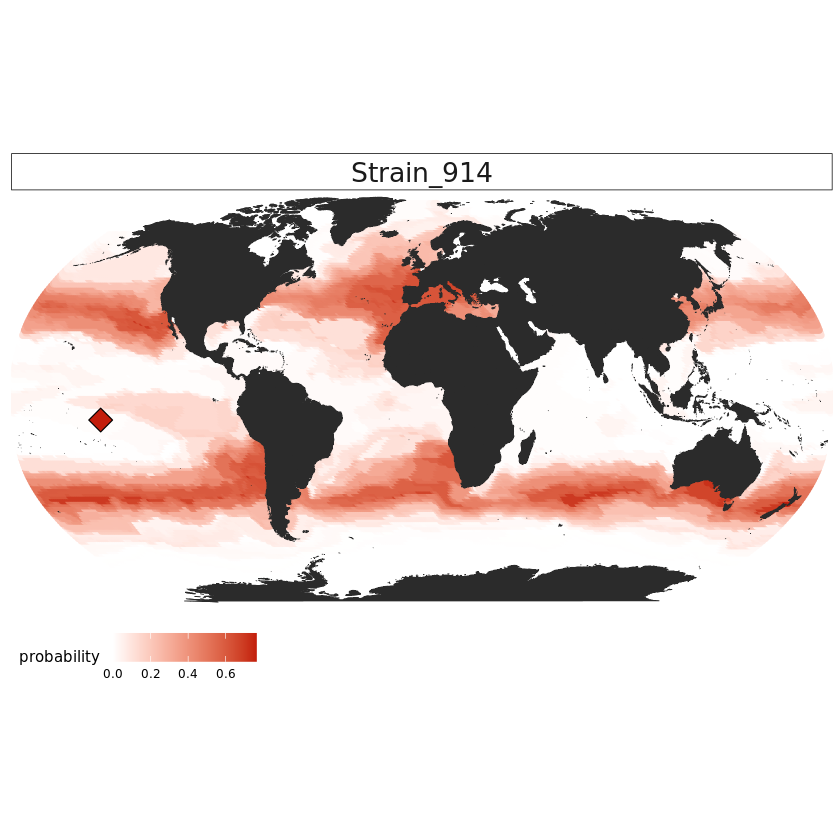

In [35]:
strain="Strain_914"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_914=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_914

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


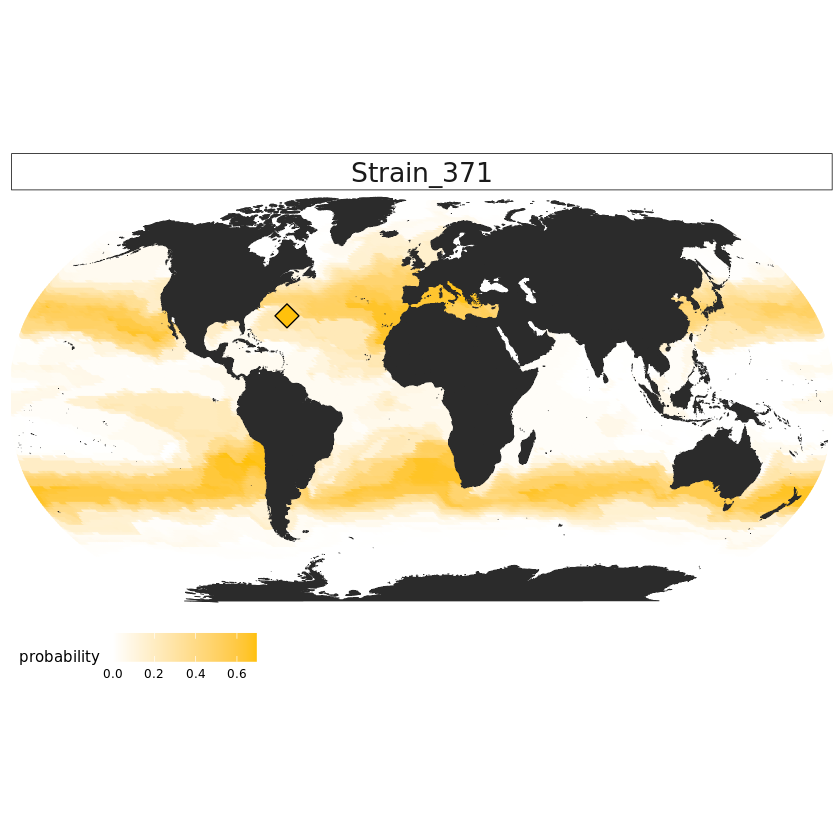

In [36]:
strain="Strain_371"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_371=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_371

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


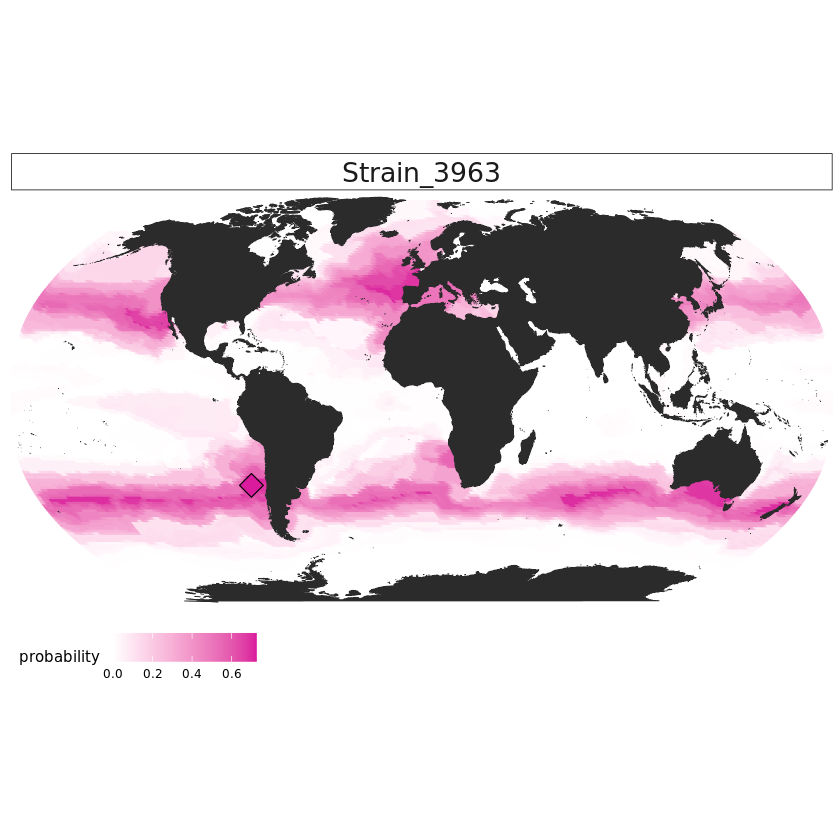

In [37]:
strain="Strain_3963"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_3963=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_3963

Joining with `by = join_by(Strains)`
Scale for colour is already present.
Adding another scale for colour, which will replace
the existing scale.
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


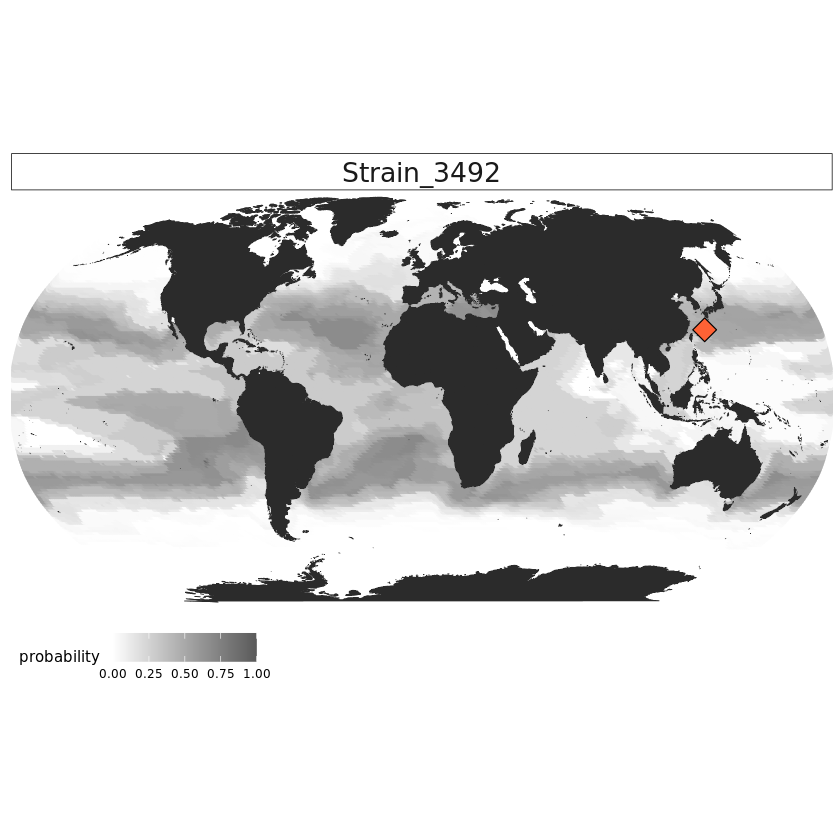

In [56]:
strain="Strain_3492"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_3492=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    scale_color_gradient(low="white",high="#5A5A5A",
                         na.value="transparent",name="probability",limits=c(0,1))+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_3492

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


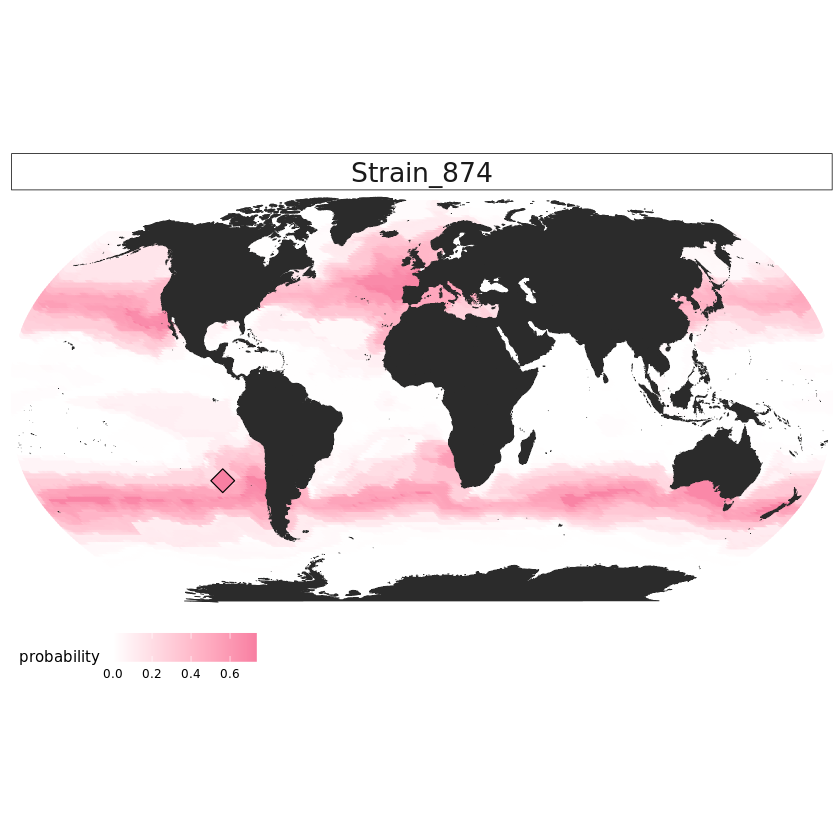

In [39]:
strain="Strain_874"
strain_num=unlist(strsplit(strain,"_"))[2]
strain_874=gg + geom_point(data=merged_df_all_bivar %>% 
    dplyr::filter(Strain==(strain)) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=sqrt(as.numeric(Probability)))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color = Probability)) + 
    scale_color_gradient(low="white",high=(strain_color_frame_harriet %>% 
                                           dplyr::filter(Strains==strain_num))$Colors[1],
                         na.value="transparent",name="probability")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA) +        
    facet_wrap(~Strain)+
    geom_point(data=color_frame%>%dplyr::filter(Strains==strain_num),
               aes(y=Latitude,x=Longitude),pch=23,
               fill=(color_frame%>%dplyr::filter(Strains==strain_num))$Colors[1],
               color="black",size=5) +
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" ))
strain_874

Warning message:
“Duplicated aesthetics after name standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


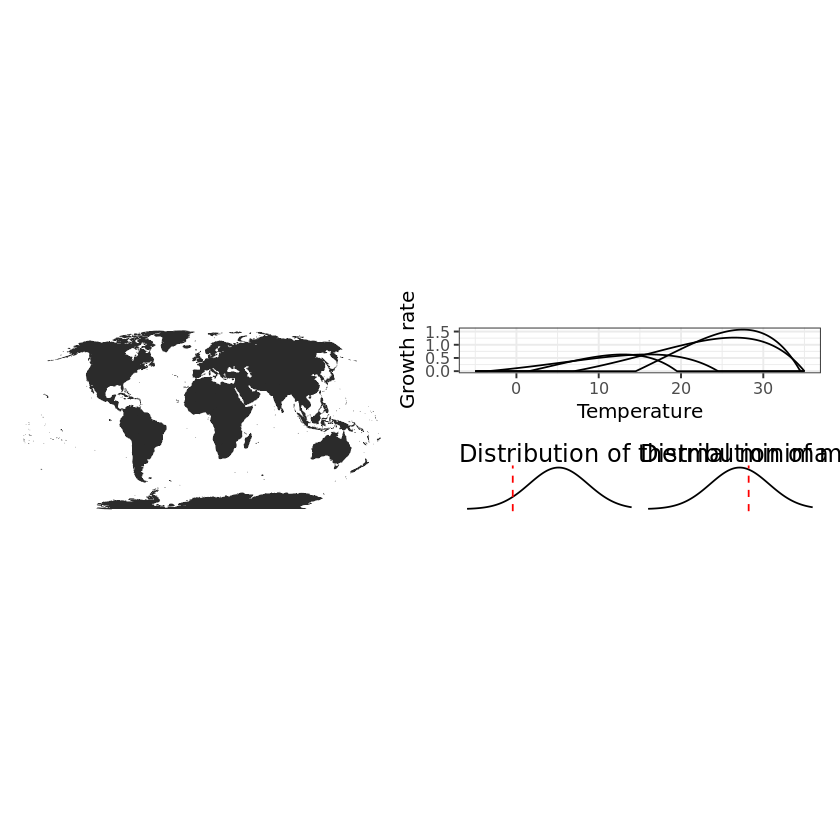

In [40]:
wrld <- map_data("world")

gg <- ggplot()
gg <- gg + geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA)
gg <- gg + coord_proj("+proj=robin +lon_0=0 +x_0=0 +y_0=0 +ellps=WGS84 +datum=WGS84 +units=m +no_defs")
gg <- gg + theme_map()

set.seed(1234)
df <- data.frame(value =round(c(rnorm(200000,
                                      mean=0,
                                      sd=1))))

norberg <- function(a,b,width,opt,Temps){
    all_nb=c()
    for (Temp in Temps) {
        if (a*exp(b*Temp)*(1-((Temp-opt)/(width/2))^2) > 0) {
            all_nb=c(all_nb,a*exp(b*Temp)*(1-((Temp-opt)/(width/2))^2))
        } else {
            all_nb=c(all_nb,0)
        }
    }
    return(paste(all_nb,collapse=","))
}

temp_vect=seq(-5,35,length.out=200)
merged_w_vals=tracer_fr_more_widths %>% rowwise() %>% dplyr::mutate(norberg_vals=norberg(a,b,w,opt,temp_vect),
                                                               temps=paste(temp_vect,collapse=",")) %>% 
    tidyr::separate_rows(norberg_vals,temps,sep=",")

merged_w_vals=merged_w_vals %>% rowwise() %>% dplyr::mutate(Tracer=factor(paste(w,opt,sep="_")))%>% 
    ungroup() %>%
    filter(Tracer %in% sample(levels(Tracer),4))

selection_plot=ggplot(merged_w_vals) + 
    geom_line(aes(x=as.numeric(temps),y=as.numeric(norberg_vals),group=Tracer)) + 
    theme_bw(base_size=12) + xlab("Temperature") + ylab("Growth rate")

# create density plot
density_plot=ggplot(df, aes(x=value)) + geom_density(adjust=15) + 
    geom_vline(aes(xintercept=0.5),color="red",linetype="dashed")+
    theme_void(base_size=12) + ggtitle("Distribution of maxima")

density_plot_2=ggplot(df, aes(x=value)) + geom_density(adjust=15) + 
    geom_vline(aes(xintercept=-2.5),color="red",linetype="dashed")+
    theme_void(base_size=12) + ggtitle("Distribution of thermal minima") 

gg|(selection_plot/(density_plot_2|density_plot)) #) + plot_layout(widths=c(1,0.3),heights=c(1,1))


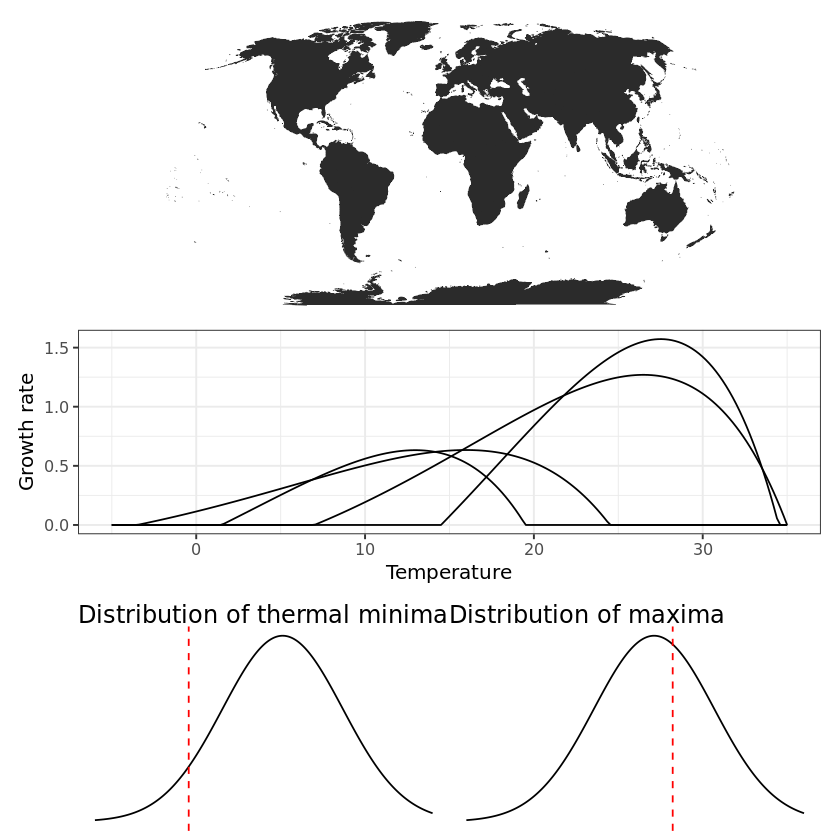

In [43]:
gg/selection_plot/(density_plot_2|density_plot) + plot_layout(heights=c(1,0.7,0.7))
ggsave("../../figures/main/04-fig_methods.pdf",width=5,height=10,units="in")

Joining with `by = join_by(Strains)`
Warning message:
“Duplicated aesthetics after name
standardisation: fill”
Warning message in geom_map(data = wrld, map = wrld, aes(x = long, y = lat, map_id = region), :
“Ignoring unknown aesthetics: x and y”


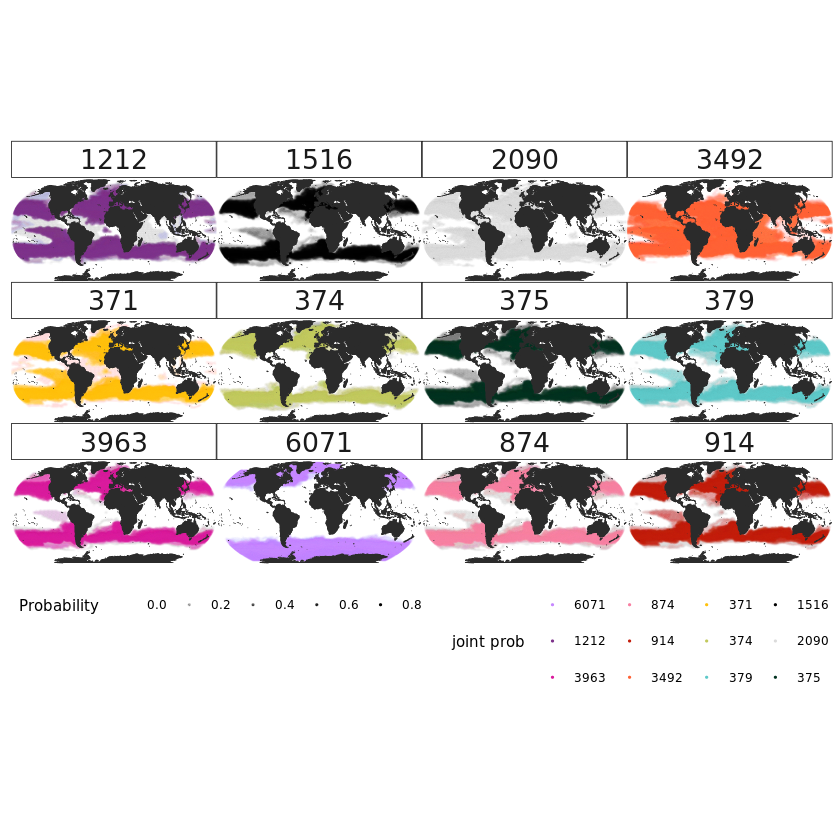

In [16]:
strain_all=gg + geom_point(data=merged_df_all_bivar  %>% 
                           tidyr::separate(Strain,into=c("extra","Strain")) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=as.numeric(Probability)) %>%
    dplyr::left_join(strain_color_frame_harriet),
    aes(x=Longitude, y = Latitude, color=factor(Strain),alpha = Probability),size=0.25) + 
    scale_color_manual(breaks=as.character(strain_color_frame_harriet$Strains),
                       values=strain_color_frame_harriet$Colors,
                         na.value="black",name="joint prob")+
    theme(legend.position = "bottom")+ geom_map(data=wrld, map=wrld,
                    aes(x=long, y=lat, map_id=region),
                    color="#2b2b2b", fill="#2b2b2b",size=0.15, fill=NA)+
    scale_alpha(range = c(0,1)) + 
  theme(strip.text = element_text(
    size = 16),strip.background = element_rect( colour="black", fill="white" )) +
    facet_wrap(~Strain)
strain_all


#ggsave("../figures/supplemental/04-fig_supplemental_strain_prob.pdf",width=20,height=20,units="in")
ggsave("../../figures/supplemental/04-fig_supplemental_strain_prob.png",dpi=400,width=20,height=20,units="in")

In [361]:
merged_df_all_bivar  %>% 
    tidyr::separate(Strain,into=c("extra","Strain")) %>%
    dplyr::mutate(Strains=as.character(Strain),Probability=as.numeric(Probability)) %>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180) %>%
    dplyr::left_join(strain_color_frame_harriet) %>%
    dplyr::left_join(color_frame%>%
                     dplyr::mutate(Strains=as.character(Strains))%>%
    dplyr::mutate(Longitude=(Longitude + 180) %% 360 - 180),by=c("Strain"="Strains","Colors")) %>%
    #dplyr::filter(Strains%in%c(3492,379)) %>% 
    dplyr::group_by(Strains) %>%
    dplyr::mutate(distlat=(sqrt((Latitude.x-Latitude.y)^2)),
                  distlon=(sqrt((Longitude.x-Longitude.y)^2)),
                  mindistlat=min(sqrt((Latitude.x-Latitude.y)^2)),
                  mindistlon=min(sqrt((Longitude.x-Longitude.y)^2))) %>%
   # dplyr::filter(sqrt((Latitude.x-Latitude.y)^2)==mindistlat) %>%
    #dplyr::filter(distlon==mindistlon) %>%
    dplyr::arrange(distlat,distlon) %>% dplyr::group_by(Strains_full) %>% 
    slice_min(order_by = distlat,n=1) %>% 
    slice_min(order_by = distlon,n=1)
    #dplyr::arrange(sqrt((Longitude.x-Longitude.y)^2))

Joining with `by =
join_by(Strains)`
Warning message in dplyr::left_join(., color_frame %>% dplyr::mutate(Strains = as.character(Strains)) %>% :
“Detected an unexpected
many-to-many relationship
between `x` and `y`.
ℹ Row 10 of `x` matches
  multiple rows in `y`.
ℹ Row 610 of `y` matches
  multiple rows in `x`.
ℹ If a many-to-many
  relationship is expected, set
  `relationship =
  "many-to-many"` to silence
  this warning.”


Latitude.x Longitude.x extra  Strain Probability  Strains Strains_full
1   -2.5       -82.5      Strain 1516   4.042767e-04 1516    CCMP1516    
2   -2.5       -82.5      Strain 2090   3.555484e-03 2090    CCMP2090    
3   31.5       -62.5      Strain 371    5.502240e-02 371     CCMP371     
4   31.5       -62.5      Strain 371    5.502240e-02 371     CCMP371     
5   31.5       -61.5      Strain 371    5.502240e-02 371     CCMP371     
6   31.5       -61.5      Strain 371    5.502240e-02 371     CCMP371     
7   32.5       -62.5      Strain 371    5.502240e-02 371     CCMP371     
8   32.5       -62.5      Strain 371    5.502240e-02 371     CCMP371     
9   32.5       -61.5      Strain 371    5.502240e-02 371     CCMP371     
10  32.5       -61.5      Strain 371    5.502240e-02 371     CCMP371     
11  42.5       -69.5      Strain 374    1.979007e-01 374     CCMP374     
12  42.5       -68.5      Strain 374    1.846311e-01 374     CCMP374     
13  31.5       -62.5      Strain 375    3.522198e-03 375     CCMP375     
14  31.5       -61.5      Strain 375    3.522198e-03 375     CCMP375     
15  32.5       -62.5      Strain 375    3.522198e-03 375     CCMP375     
16  32.5       -61.5      Strain 375    3.522198e-03 375     CCMP375     
17  50.5        -5.5      Strain 379    3.026022e-01 379     CCMP379     
18 -34.5        17.5      Strain 1212   3.130351e-01 1212    RCC1212     
19  26.5       128.5      Strain 3492   1.582651e-01 3492    RCC3492     
20 -33.5       -78.5      Strain 3963   4.312364e-01 3963    RCC3963     
21 -63.5       176.5      Strain 6071   2.689401e-01 6071    RCC6071     
22 -31.5       -91.5      Strain 874    6.589583e-02 874     RCC874      
23  -8.5      -141.5      Strain 914    5.335751e-05 914     RCC914      
   Colors  Latitude.y Longitude.y X        distlat distlon mindistlat
1  #000000  -2.6700    -82.7200   CCMP1516 0.1700  0.2200  0.1700    
2  #DBDBDB  -2.6700    -82.7200   CCMP2090 0.1700  0.2200  0.1700    
3  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
4  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
5  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
6  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
7  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
8  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
9  #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
10 #ffc10c  32.0000    -62.0000   CCMP371  0.5000  0.5000  0.5000    
11 #C2C95E  42.5000    -69.0000   CCMP374  0.0000  0.5000  0.0000    
12 #C2C95E  42.5000    -69.0000   CCMP374  0.0000  0.5000  0.0000    
13 #013220  32.0000    -62.0000   CCMP375  0.5000  0.5000  0.5000    
14 #013220  32.0000    -62.0000   CCMP375  0.5000  0.5000  0.5000    
15 #013220  32.0000    -62.0000   CCMP375  0.5000  0.5000  0.5000    
16 #013220  32.0000    -62.0000   CCMP375  0.5000  0.5000  0.5000    
17 #5EC9C9  50.1669     -4.2504   CCMP379  0.3331  1.2496  0.3331    
18 #7d328b -34.4700     17.3000   RCC1212  0.0300  0.2000  0.0300    
19 #ff6235  26.6100    127.8700   RCC3492  0.1100  0.6300  0.1100    
20 #da1b9d -33.6300    -78.8200   RCC3963  0.1300  0.3200  0.1300    
21 #c688ff -63.6800    176.1200   RCC6071  0.1800  0.3800  0.1800    
22 #f87fa2 -31.8200    -91.4700   RCC874   0.3200  0.0300  0.3200    
23 #c31d0b  -8.3300   -141.2500   RCC914   0.1700  0.2500  0.1700    
   mindistlon
1  0.2200    
2  0.2200    
3  0.5000    
4  0.5000    
5  0.5000    
6  0.5000    
7  0.5000    
8  0.5000    
9  0.5000    
10 0.5000    
11 0.5000    
12 0.5000    
13 0.5000    
14 0.5000    
15 0.5000    
16 0.5000    
17 0.2496    
18 0.2000    
19 0.3700    
20 0.3200    
21 0.3800    
22 0.0300    
23 0.2500

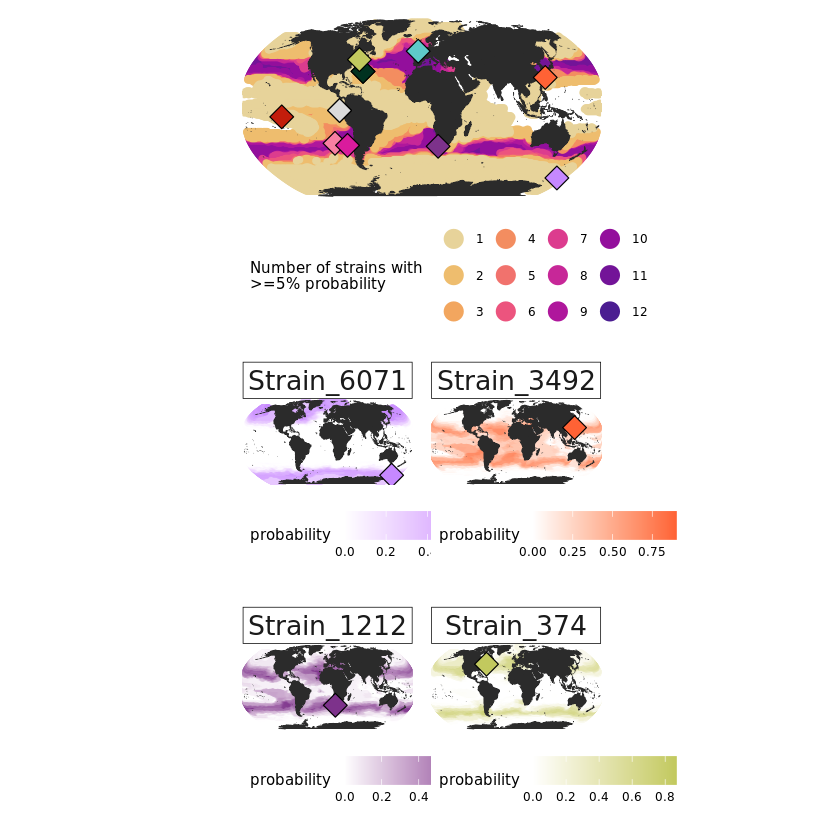

In [49]:
map_overlap_teal_bivar/((strain_6071 | strain_3492) / (strain_1212 | strain_374))

ggsave("../../figures/main/04-fig_strains_info.pdf",width=10,height=20,units="in")

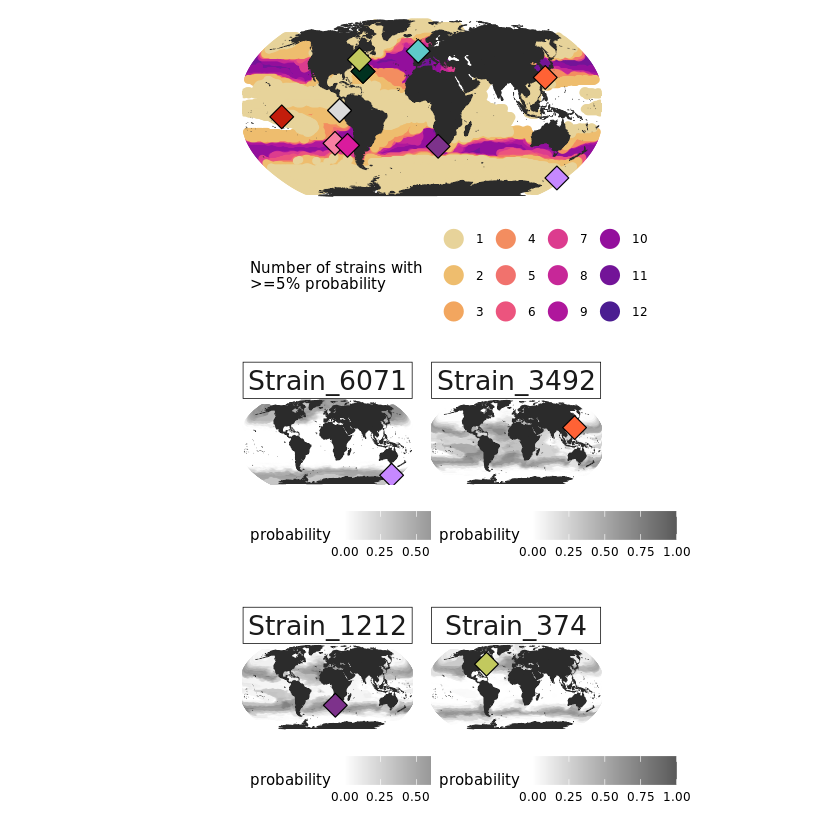

In [58]:
map_overlap_teal_bivar/((strain_6071 | strain_3492) / (strain_1212 | strain_374))

ggsave("../../figures/main/04-fig_strains_grayscale.pdf",width=10,height=20,units="in")
